# `Bike Sharing Dateset`

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

 * Data Linke : `https://www.kaggle.com/datasets/rishabhbarman/bike-sharing-dateset`

## `Data Features`

* `instant`: record index
* `datetime`: The timestamp of the bike rental record, including both date and time. This column is essential for analyzing temporal patterns in bike rentals.
* `season`: The season in which the bike rental occurred. Usually encoded as:
* Winter|Spring|Summer|Fall
* `hr` : hour (0 to 23)
* `yr` : year (0: 2011, 1:2012)
* `holiday`: A binary indicator (0 or 1) showing whether the day is a public holiday. This column helps in understanding the impact of holidays on bike rental demand.
* `workingday`: A binary indicator (0 or 1) indicating whether the day is a working day (i.e., neither a weekend nor a holiday). This column is useful for distinguishing between weekday and weekend rental patterns.
* `weekday` : day of the week
* `weathersit` : A categorical variable describing the weather conditions during the bike rental period. Commonly encoded as:
1. Clear, Few clouds, Partly cloudy, Partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* `temp`: The temperature (in Celsius) at the time of the bike rental. This continuous variable helps in analyzing how temperature influences bike rental activity.
* `atemp`: The "feels-like" temperature (in Celsius) at the time of the bike rental. This adjusted temperature takes into account factors like humidity and wind chill.
* `humidity`: Normalized humidity. The values are divided to 100 (max).
* `windspeed`:  windspeed: Normalized wind speed. The values are divided to 67 (max).
* `casual`: The number of casual users (non-registered) who rented bikes. This count provides insights into how occasional users contribute to overall bike rentals.
* `registered`: The number of registered users who rented bikes. This count reflects the activity of regular users who have a membership or subscription to the bike-sharing system.
* `cnt`: The total number of bikes rented, summing both casual and registered users. This column is the primary target variable for analyzing and predicting bike rental demand.

## `Standard Libaries`

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

## `Importing DataSet`

In [2]:
Data_1 = pd.read_csv("/kaggle/input/bike-sharing-dateset/day.csv" , index_col="instant")
Data_1.head()

dteday  season  yr  mnth  holiday  weekday  workingday  \
instant                                                               
1        2011-01-01       1   0     1        0        6           0   
2        2011-01-02       1   0     1        0        0           0   
3        2011-01-03       1   0     1        0        1           1   
4        2011-01-04       1   0     1        0        2           1   
5        2011-01-05       1   0     1        0        3           1   

         weathersit      temp     atemp       hum  windspeed  casual  \
instant                                                                
1                 2  0.344167  0.363625  0.805833   0.160446     331   
2                 2  0.363478  0.353739  0.696087   0.248539     131   
3                 1  0.196364  0.189405  0.437273   0.248309     120   
4                 1  0.200000  0.212122  0.590435   0.160296     108   
5                 1  0.226957  0.229270  0.436957   0.186900      82   

         registered   cnt  
instant                    
1               654   985  
2               670   801  
3              1229  1349  
4              1454  1562  
5              1518  1600

In [3]:
Data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 731 entries, 1 to 731
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.4+ KB


In [4]:
Data_1.describe()

season          yr        mnth     holiday     weekday  workingday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.496580    0.500684    6.519836    0.028728    2.997264    0.683995   
std      1.110807    0.500342    3.451913    0.167155    2.004787    0.465233   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    1.000000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.544894    0.183051    0.162961    0.142429    0.077498   
min      1.000000    0.059130    0.079070    0.000000    0.022392   
25%      1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    0.498333    0.486733    0.626667    0.180975   
75%      2.000000    0.655417    0.608602    0.730209    0.233214   
max      3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

In [5]:
Data_1.isna().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
Data_1.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## `Convet "dteday" from object to datetime`

In [7]:
Data_1["dteday"] = pd.to_datetime(Data_1["dteday"], format="%Y-%m-%d")

In [8]:
Data_1["dteday"].dtype

dtype('<M8[ns]')

In [9]:
plt.style.use('ggplot')

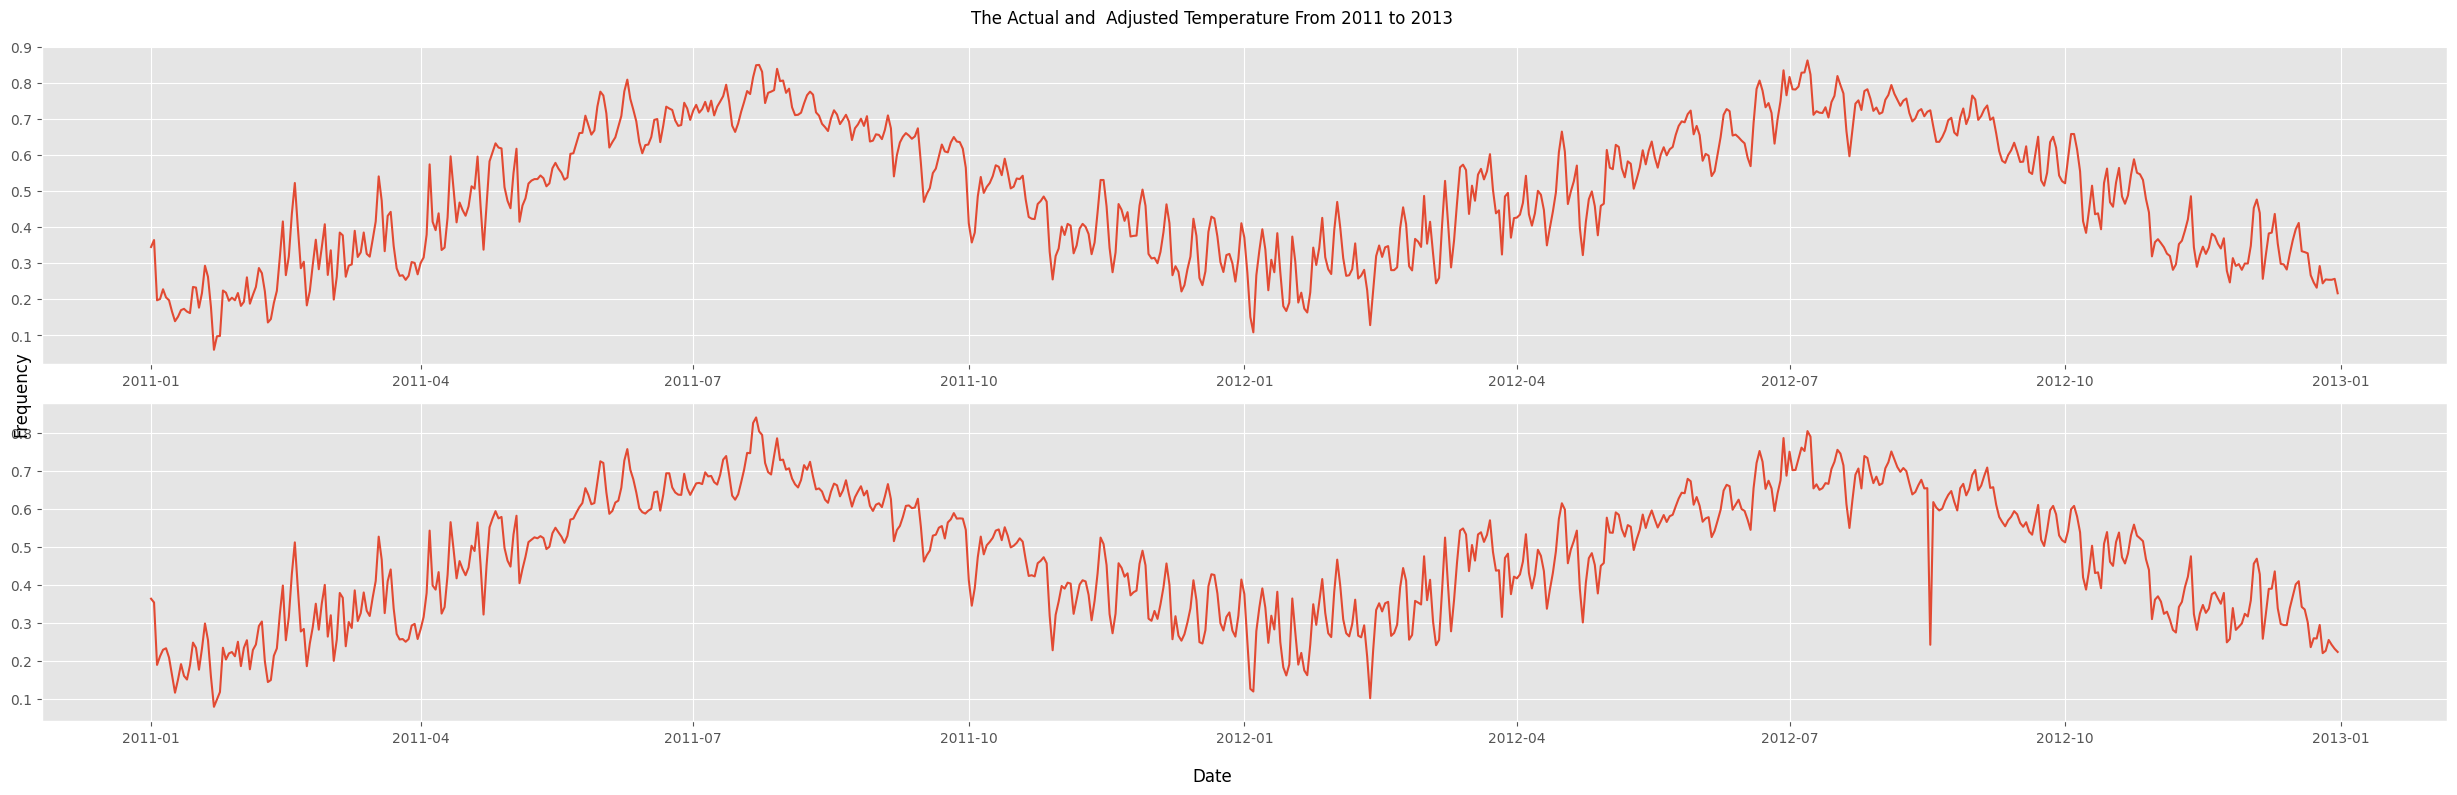

In [10]:
fig , ax = plt.subplots(nrows=2 , ncols=1 ,figsize=(25,8) )
Date =Data_1["dteday"]
Temp_1 =Data_1["temp"]
Temp_2 =Data_1["atemp"]
ax[0].plot(Date , Temp_1)
ax[1].plot(Date , Temp_2)
fig.suptitle("The Actual and  Adjusted Temperature From 2011 to 2013")
fig.supxlabel("Date")
fig.supylabel("Frequency")
fig.tight_layout()
ax[0].grid(True)
ax[1].grid(True)

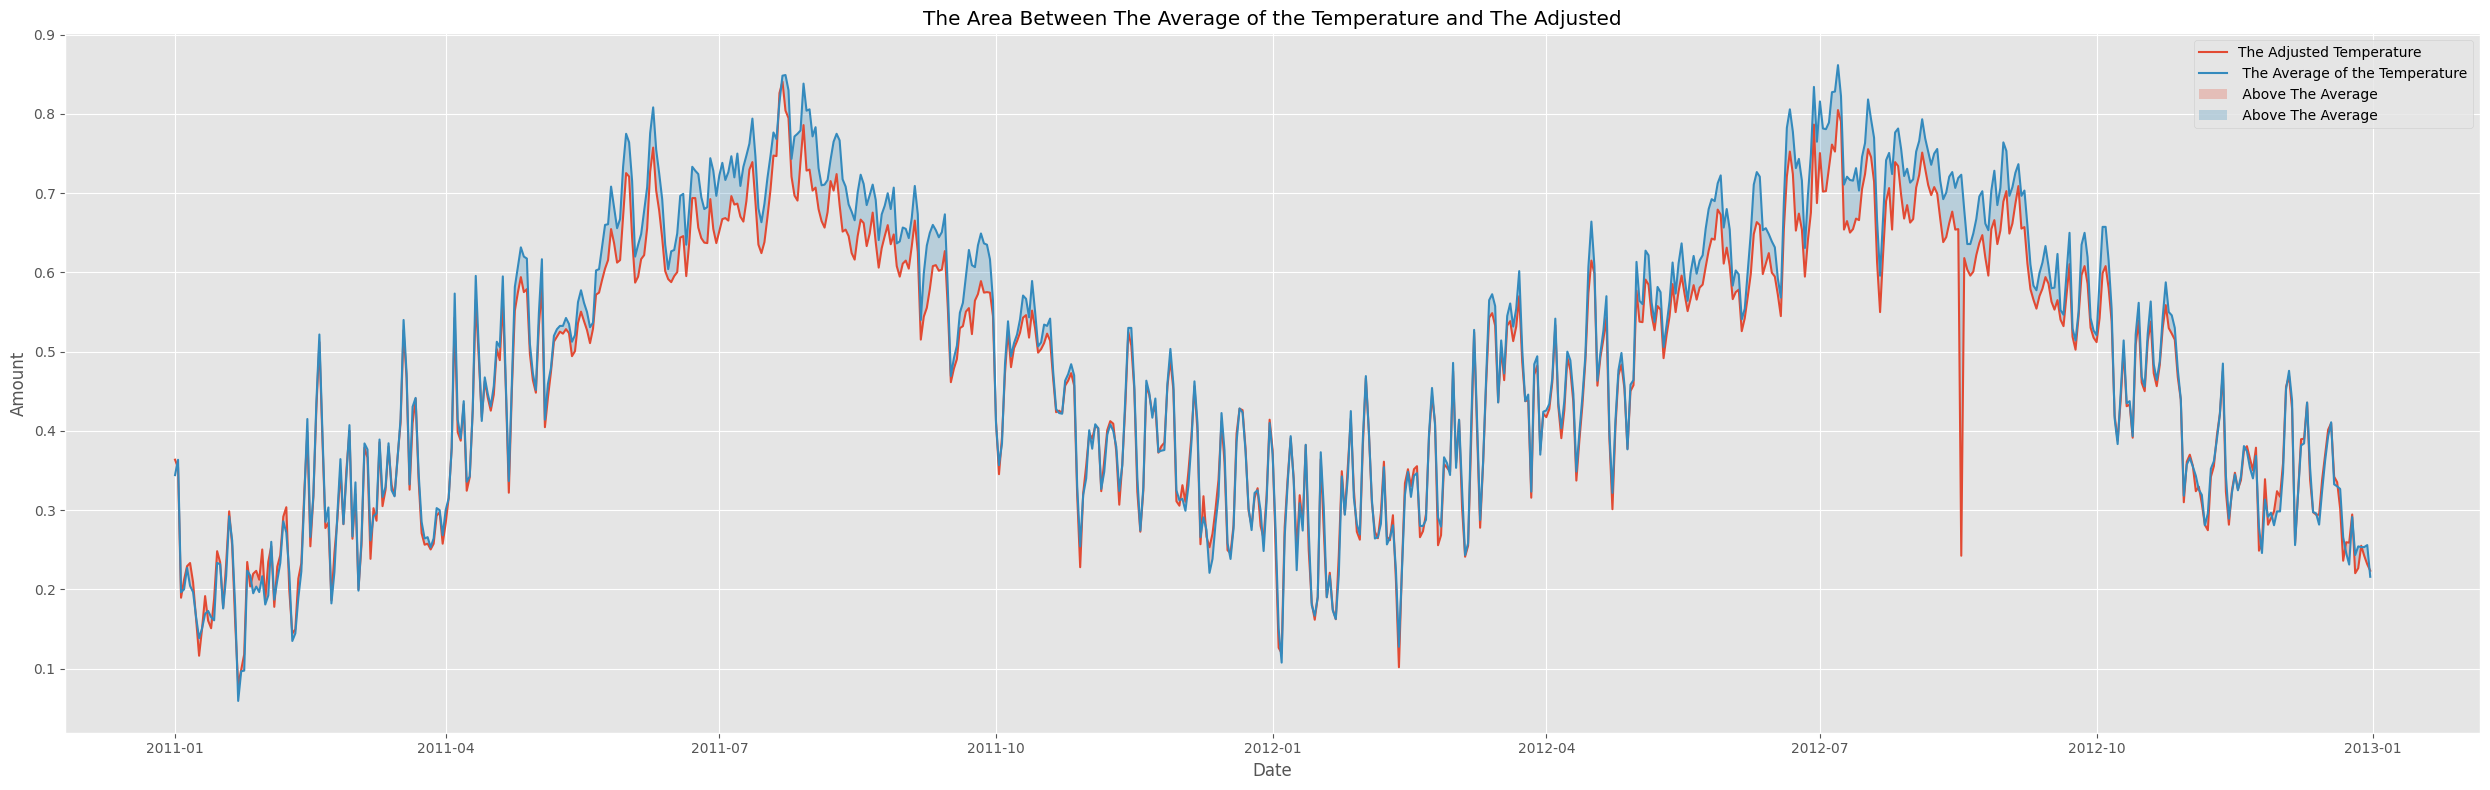

In [11]:
plt.figure(figsize=(25,8))
plt.plot(Date , Temp_2 , label = 'The Adjusted Temperature')
plt.plot(Date , Temp_1  , label = " The Average of the Temperature")
plt.fill_between(Date ,Temp_2 , Temp_1 , alpha = 0.25 ,where =(Temp_2 > Temp_1), interpolate = True , label = " Above The Average")
plt.fill_between(Date ,Temp_2 , Temp_1 , alpha = 0.25 ,where =(Temp_2 < Temp_1), interpolate = True , label = " Above The Average")
plt.title("The Area Between The Average of the Temperature and The Adjusted")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

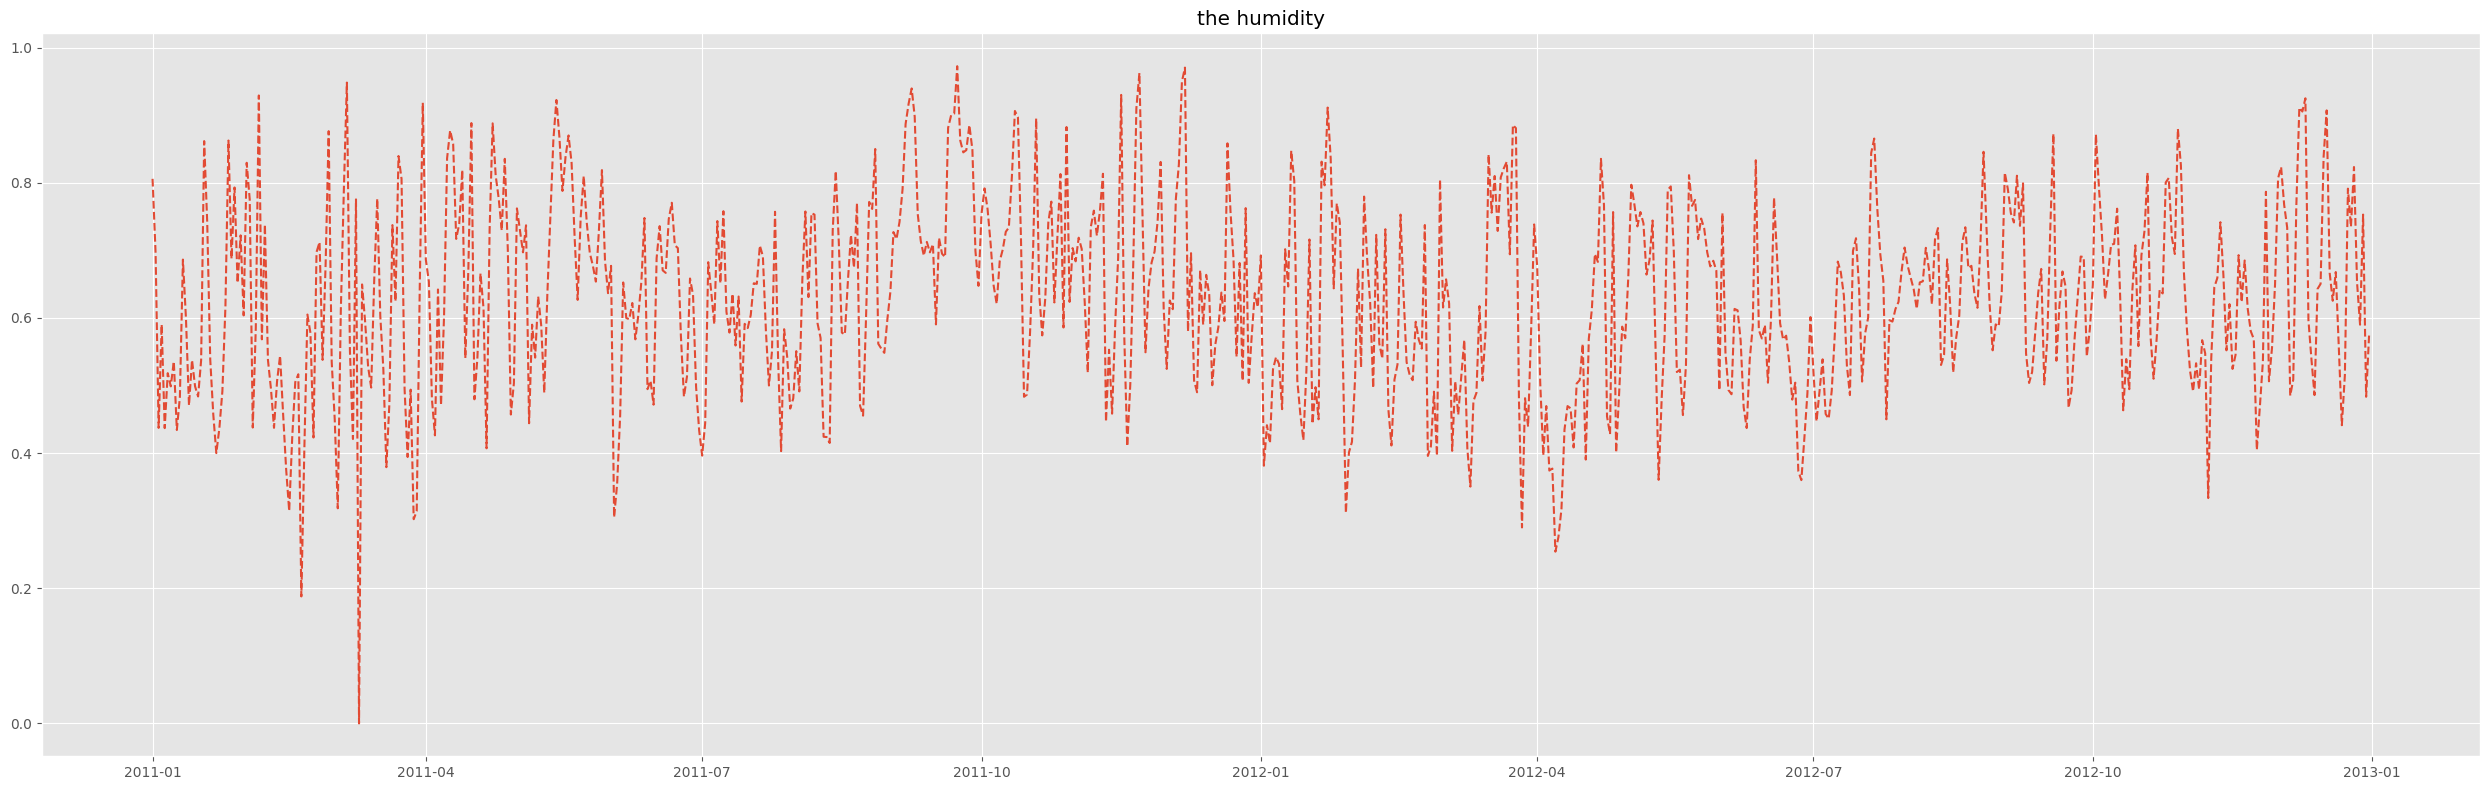

In [12]:
humidity = Data_1["hum"]
plt.figure(figsize=(25,8))
plt.plot(Date , humidity , linestyle = "--" ,label ="the Humidity ")
plt.title("the humidity")
plt.tight_layout()
plt.grid(True)
plt.show()

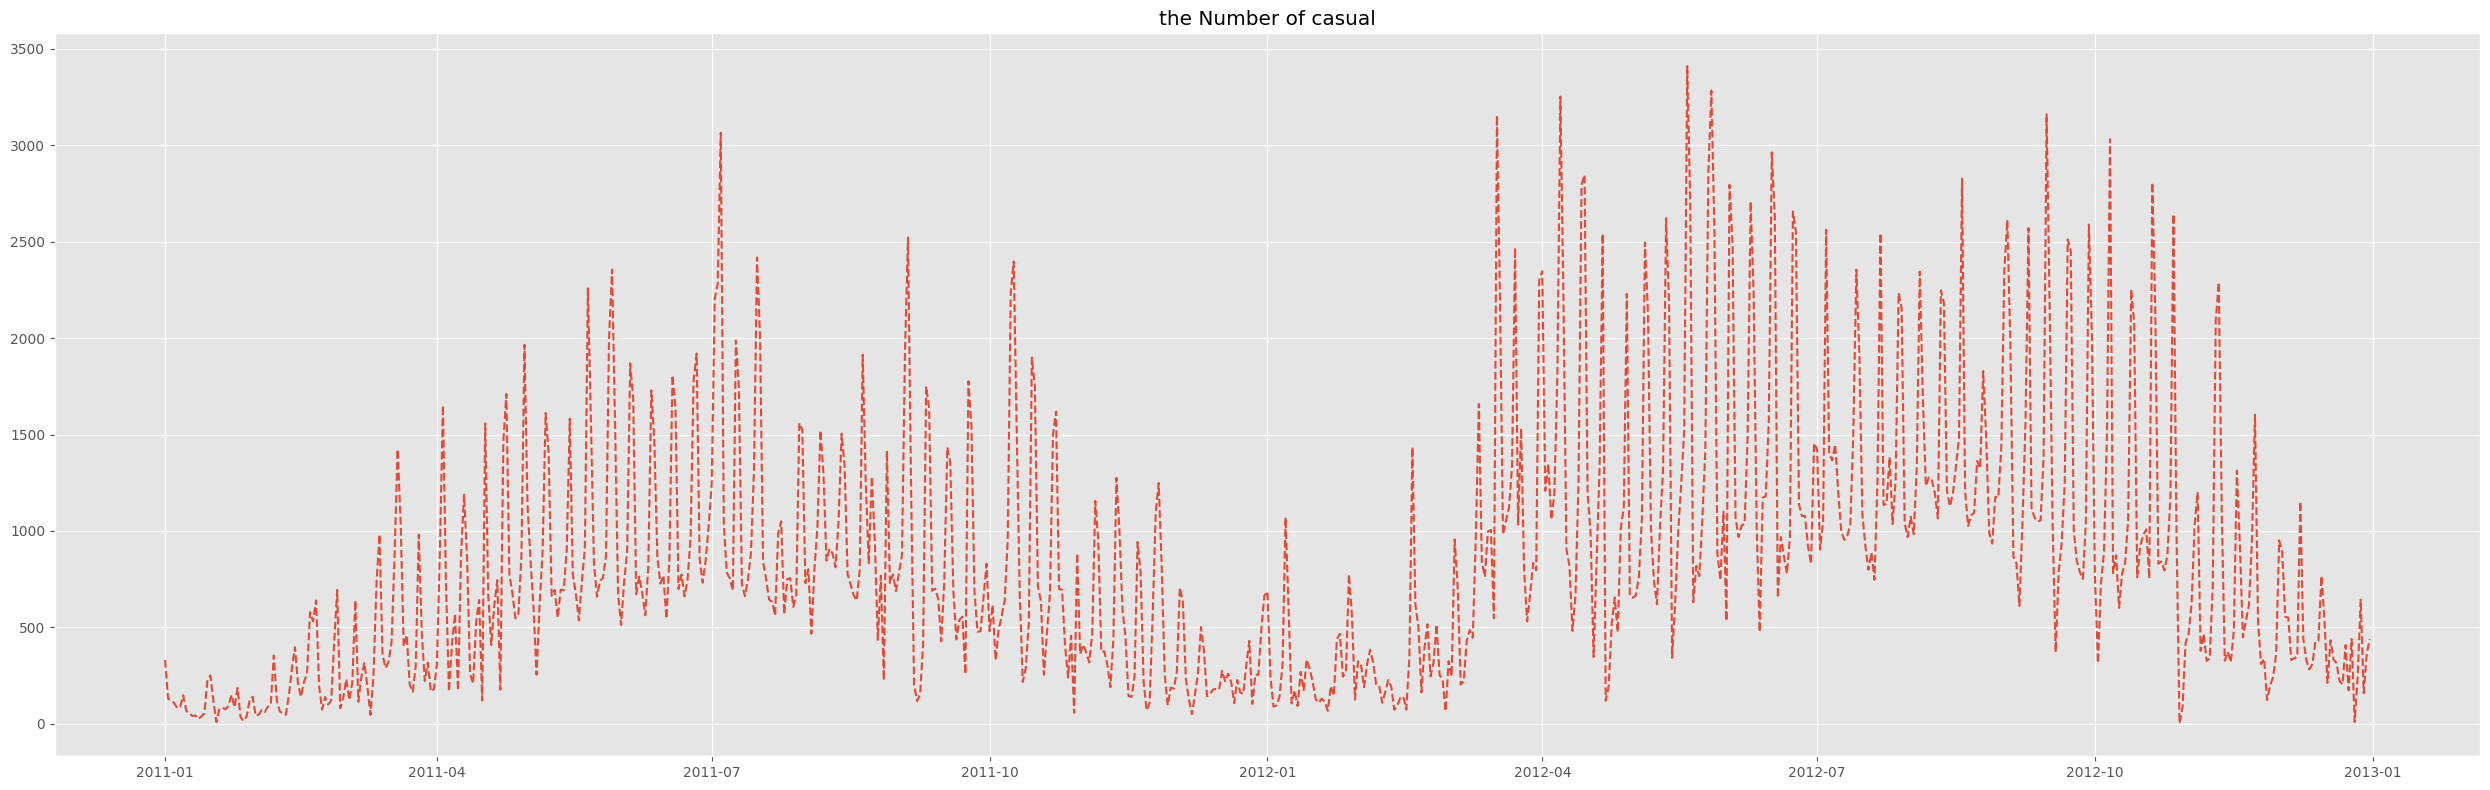

In [13]:
Casual = Data_1["casual"]
plt.figure(figsize=(25,8))
plt.plot(Date , Casual , linestyle = "--" ,label ="the Number of casual ")
plt.title("the Number of casual")
plt.tight_layout()
plt.grid(True)
plt.show()

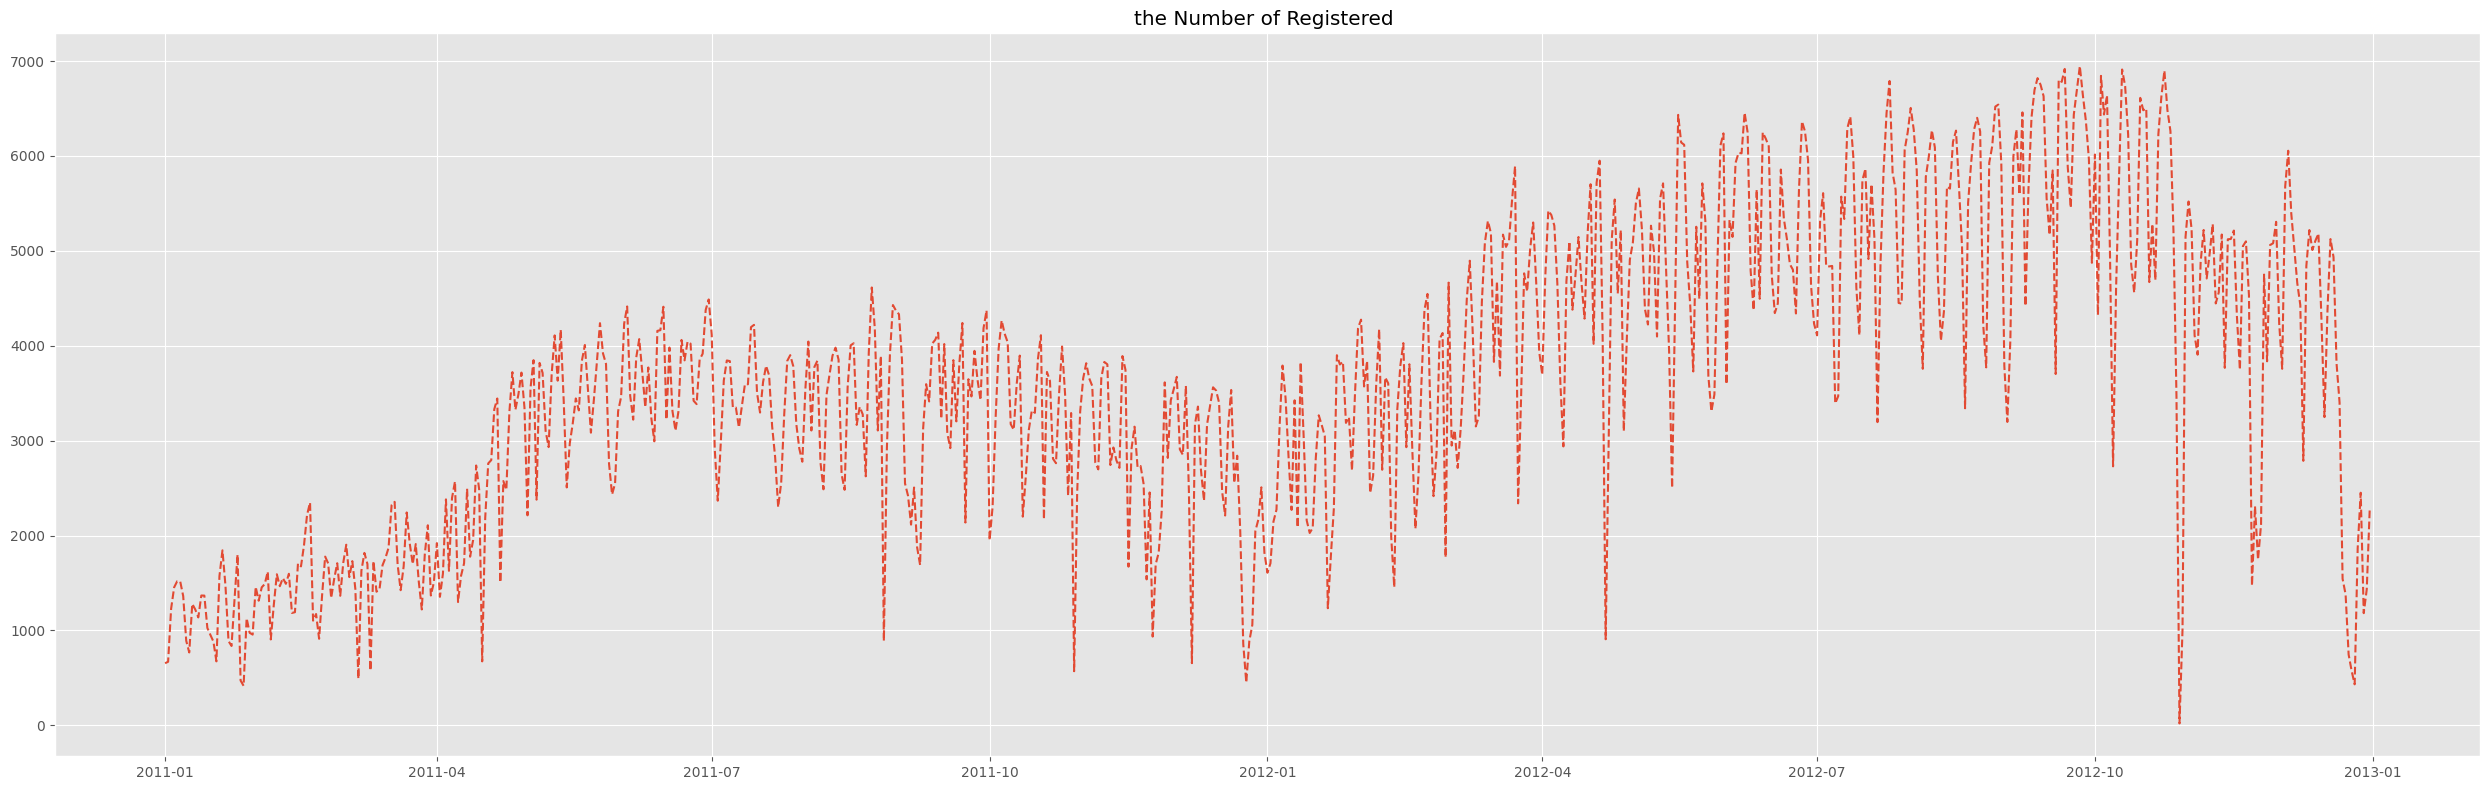

In [14]:
Registered  = Data_1["registered"]
plt.figure(figsize=(25,8))
plt.plot(Date ,Registered , linestyle = "--" ,label ="the Number of Registered  ")
plt.title("the Number of Registered ")
plt.tight_layout()
plt.grid(True)
plt.show()

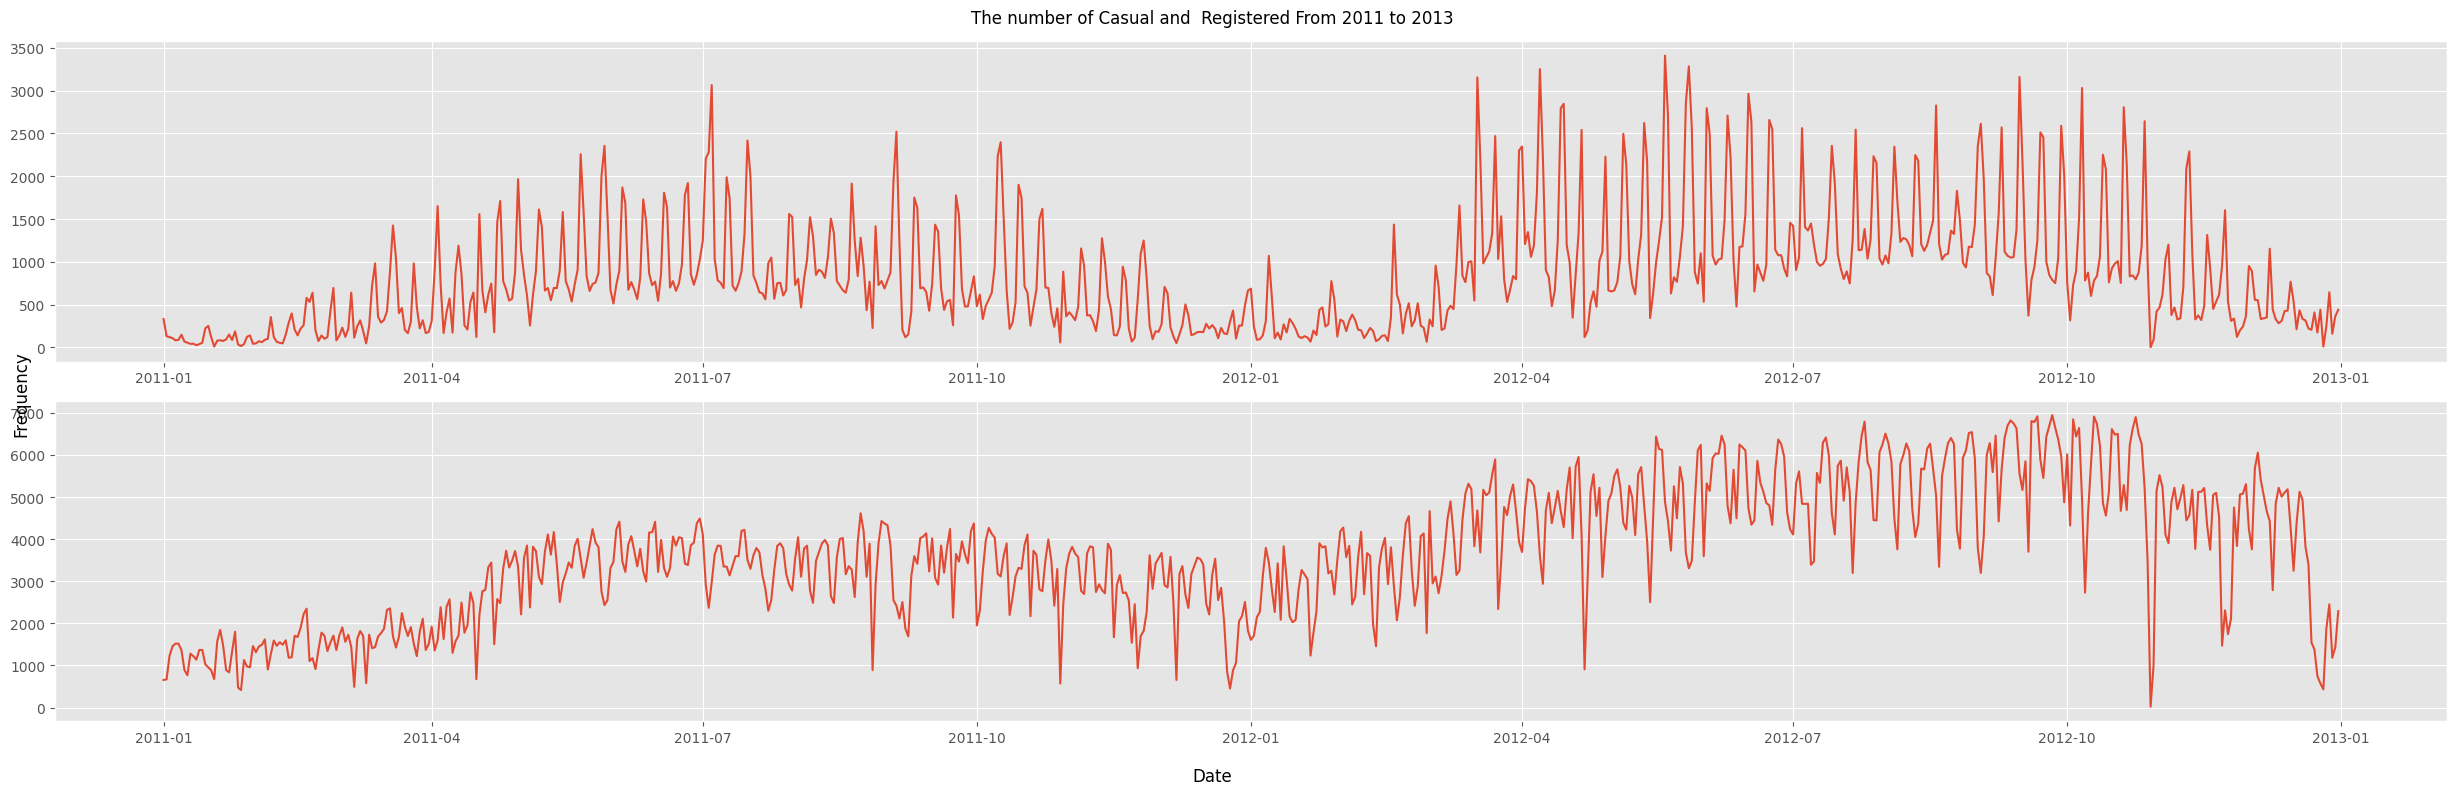

In [15]:
fig , ax = plt.subplots(nrows=2 , ncols=1 ,figsize=(25,8) )
Date =Data_1["dteday"]
ax[0].plot(Date , Casual)
ax[1].plot(Date , Registered)
fig.suptitle("The number of Casual and  Registered From 2011 to 2013")
fig.supxlabel("Date")
fig.supylabel("Frequency")
fig.tight_layout()
ax[0].grid(True)
ax[1].grid(True)

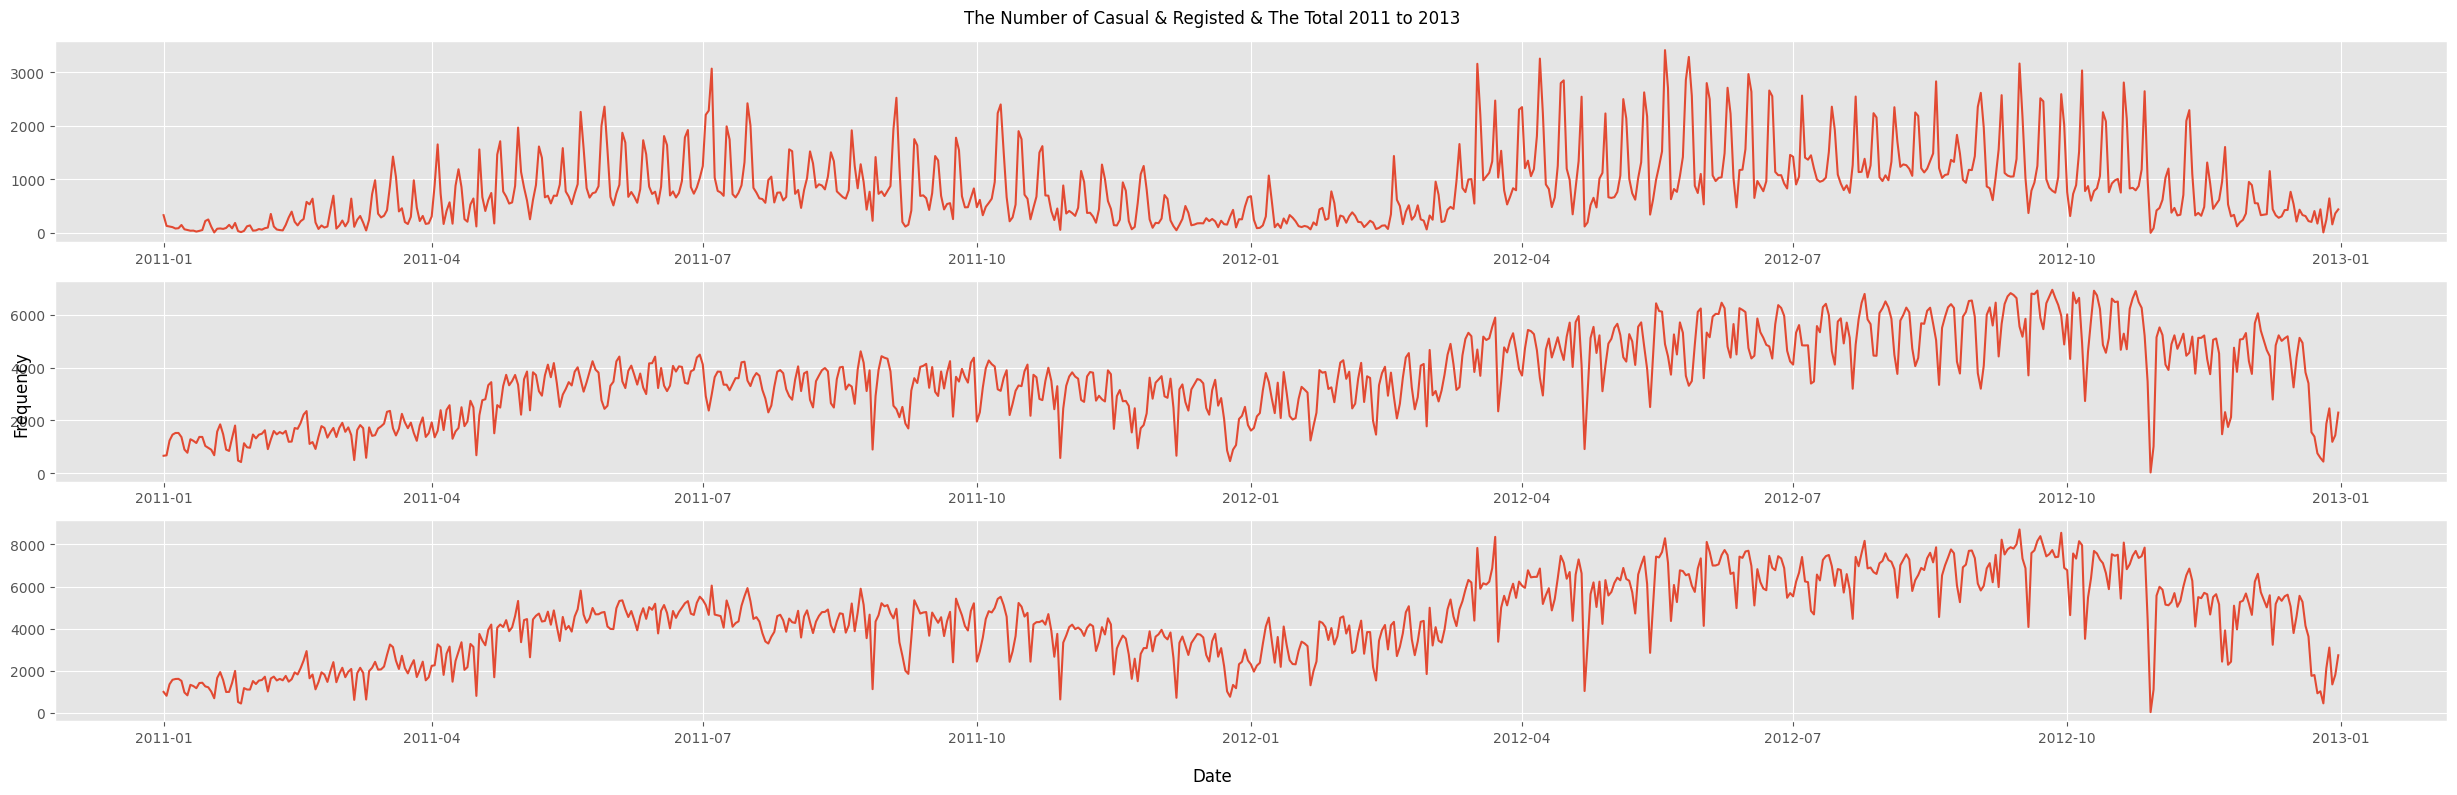

In [16]:
fig , ax = plt.subplots(nrows=3 , ncols=1 ,figsize=(25,8) )
Date =Data_1["dteday"]
Temp_1 =Data_1["temp"]
Temp_2 =Data_1["atemp"]
ax[0].plot(Date , Casual)
ax[1].plot(Date , Registered)
ax[2].plot(Date , Data_1["cnt"])
fig.suptitle("The Number of Casual & Registed & The Total 2011 to 2013")
fig.supxlabel("Date")
fig.supylabel("Frequency")
fig.tight_layout()
ax[0].grid(True)
ax[1].grid(True)

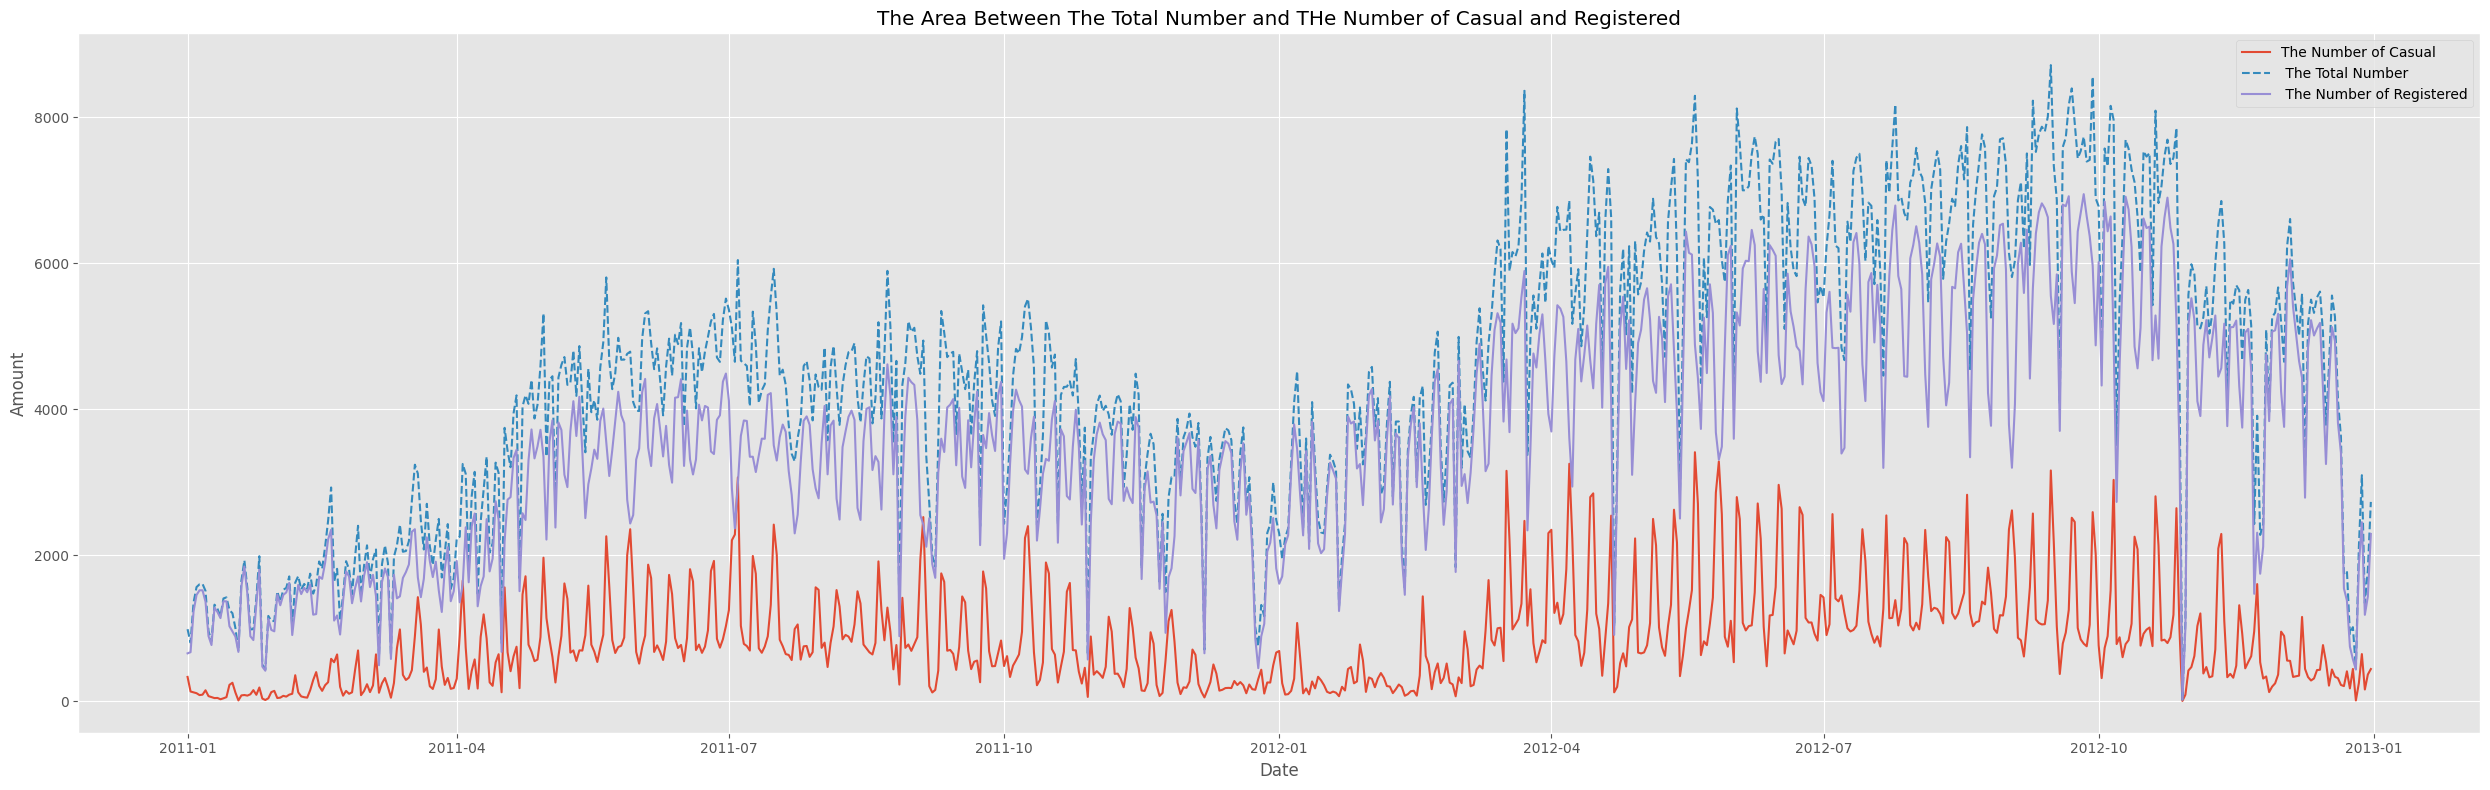

In [17]:
plt.figure(figsize=(25,8))
The_Total = Data_1["cnt"]
plt.plot(Date , Casual , label = 'The Number of Casual')
plt.plot(Date , The_Total  , label = " The Total Number " ,linestyle = "--")
plt.plot(Date , Registered , label = " The Number of Registered")
plt.title("The Area Between The Total Number and THe Number of Casual and Registered")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

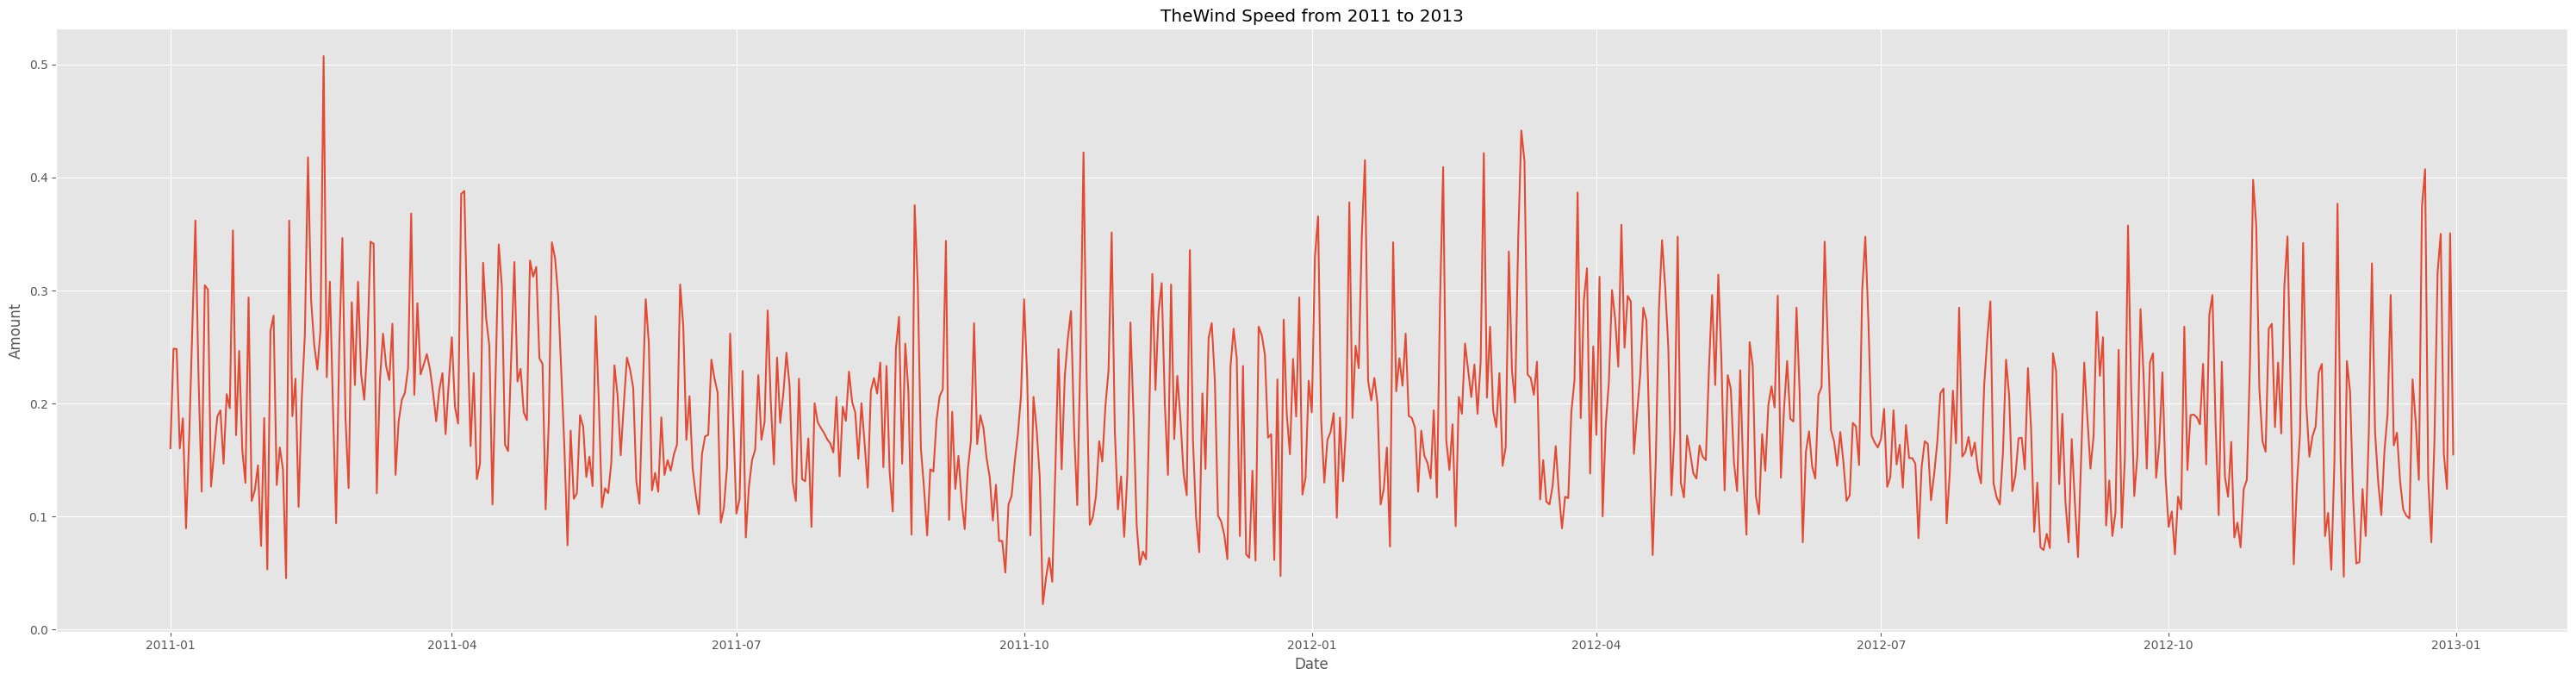

In [18]:
plt.figure(figsize=(30,8))
Wind_speed = Data_1["windspeed"]
plt.plot(Date ,Wind_speed  , label = 'The Wind Speed')
plt.title("TheWind Speed from 2011 to 2013")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.tight_layout()
plt.grid(True)
plt.show()

In [19]:
Data_1["season"].value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [20]:
Data_1["season"].replace(1 , " Winter" , inplace=True)
Data_1["season"].replace(2 , "Spring" , inplace=True)
Data_1["season"].replace(3 , "Summer" , inplace=True)
Data_1["season"].replace(4 , "Fall" , inplace=True)

In [21]:
Data_1["weathersit"].value_counts()

weathersit
1    463
2    247
3     21
Name: count, dtype: int64

In [22]:
Data_1["weathersit"].replace(1 , "Clear Weather" , inplace=True)
Data_1["weathersit"].replace(2 , "Mist & Cloudy" , inplace=True)
Data_1["weathersit"].replace(3 , "Light Snow & Ice Pallets" , inplace=True)

In [23]:
Data_1["weekday"].value_counts()

weekday
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: count, dtype: int64

In [24]:
Data_1["weekday"].replace(0 , "Sa" , inplace=True)
Data_1["weekday"].replace(1 , "Su" , inplace=True)
Data_1["weekday"].replace(2 , "Mo" , inplace=True)
Data_1["weekday"].replace(3 , "Tu" , inplace=True)
Data_1["weekday"].replace(4 , "We" , inplace=True)
Data_1["weekday"].replace(5 , "Th" , inplace=True)
Data_1["weekday"].replace(6 , "Fr" , inplace=True)

In [25]:
Data_1["holiday"].value_counts()

holiday
0    710
1     21
Name: count, dtype: int64

In [26]:
Data_1["holiday"].replace(0 , "Not Weekend" , inplace=True)
Data_1["holiday"].replace(1 , "Weekend" , inplace=True)

In [27]:
Data_1["workingday"].value_counts()

workingday
1    500
0    231
Name: count, dtype: int64

In [28]:
Data_1["workingday"].replace(0 , "No Work" , inplace=True)
Data_1["workingday"].replace(1 , "Work" , inplace=True)

In [29]:
Data_1.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

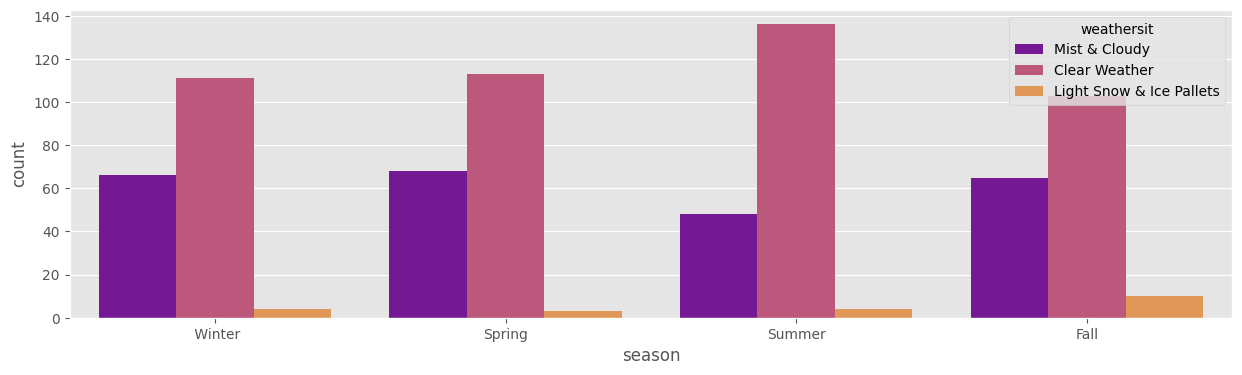

In [30]:
plt.figure(figsize=(15,4))
sns.countplot(data=Data_1 ,x='season', hue= "weathersit" , palette="plasma" )
plt.show()

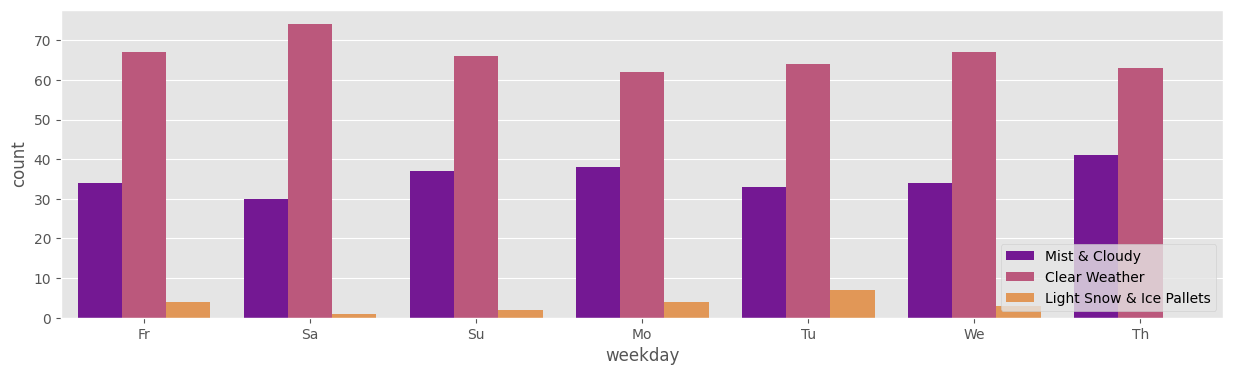

In [31]:
plt.figure(figsize=(15,4))
sns.countplot(data=Data_1 ,x='weekday', hue= "weathersit" , palette="plasma" )
plt.legend(loc=4)
plt.show()

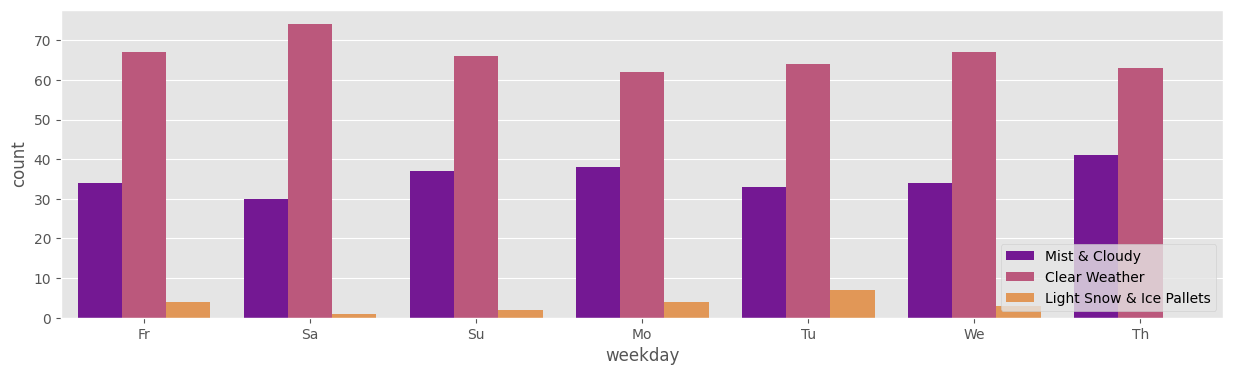

In [32]:
plt.figure(figsize=(15,4))
sns.countplot(data=Data_1 ,x='weekday', hue= "weathersit" , palette="plasma" )
plt.legend(loc=4)
plt.show()

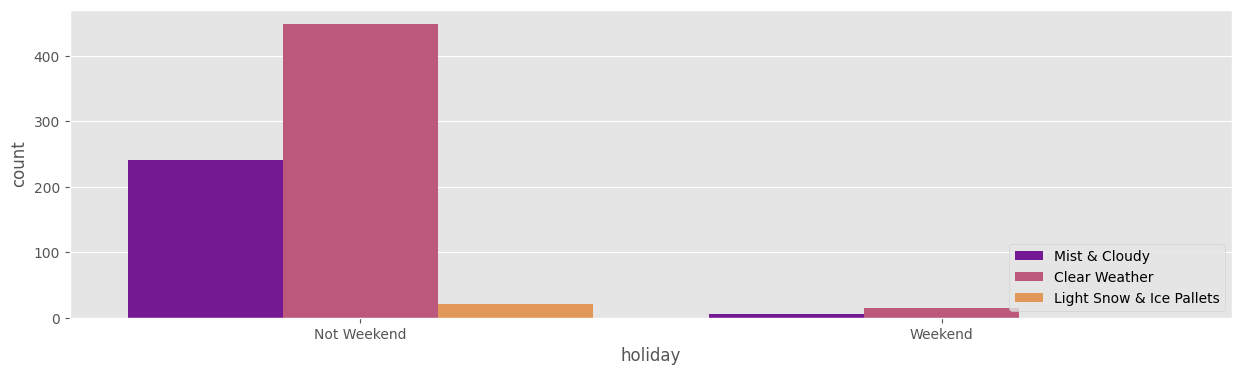

In [33]:
plt.figure(figsize=(15,4))
sns.countplot(data=Data_1 ,x='holiday', hue= "weathersit" , palette="plasma" )
plt.legend(loc=4)
plt.show()

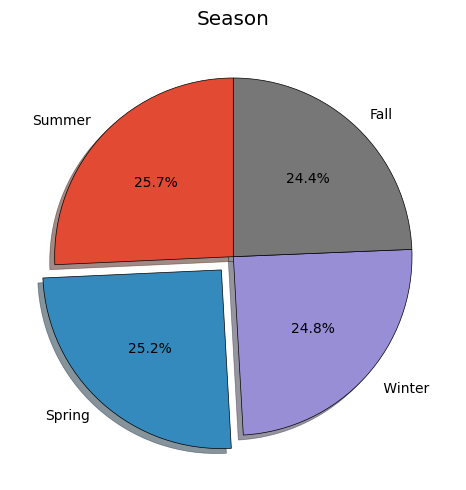

In [34]:
plt.figure(figsize=(5,5))
season = Data_1["season"].value_counts()
plt.pie(season.values , labels= season.keys()
        , wedgeprops={"edgecolor":"black"} , explode =[0,0.1,0,0], shadow=True
       ,startangle= 90 , autopct = '%1.1f%%' )
plt.title("Season")
plt.tight_layout()
plt.show()

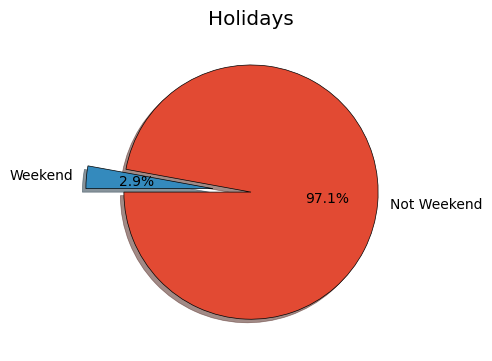

In [35]:
plt.figure(figsize=(5,5))
Holiday = Data_1["holiday"].value_counts()
plt.pie(Holiday.values , labels= Holiday.keys()
        , wedgeprops={"edgecolor":"black"} , explode =[0,0.3], shadow=True
       ,startangle= 180 , autopct = '%1.1f%%' )
plt.title("Holidays")
plt.tight_layout()
plt.show()

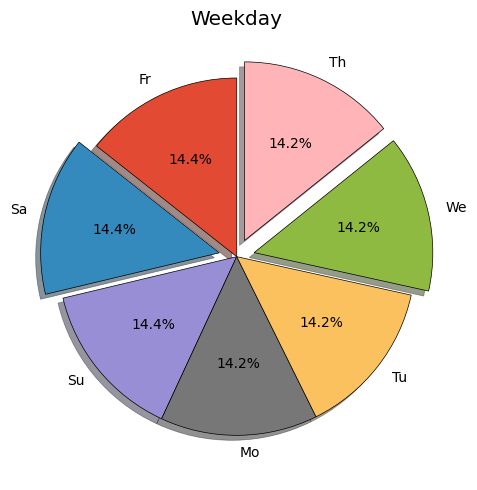

In [36]:
plt.figure(figsize=(5,5))
Week_day = Data_1["weekday"].value_counts()
plt.pie(Week_day.values , labels= Week_day.keys()
        , wedgeprops={"edgecolor":"black"} , explode =[0,0.1,0,0,0,0.1 ,0.1], shadow=True
       ,startangle= 90 , autopct = '%1.1f%%' )
plt.title("Weekday")
plt.tight_layout()
plt.show()

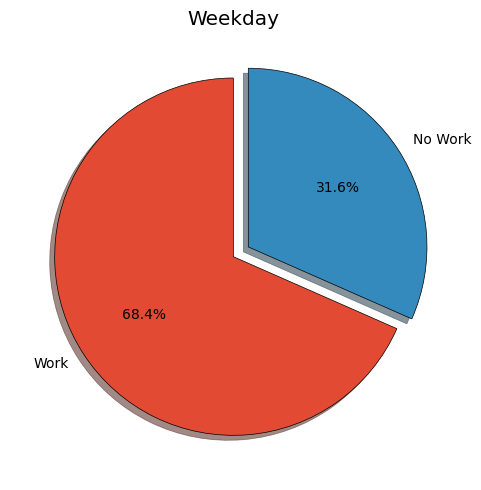

In [37]:
plt.figure(figsize=(5,5))
Working_Day = Data_1["workingday"].value_counts()
plt.pie(Working_Day.values , labels= Working_Day.keys()
        , wedgeprops={"edgecolor":"black"} , explode =[0,0.1], shadow=True
       ,startangle= 90 , autopct = '%1.1f%%' )
plt.title("Weekday")
plt.tight_layout()
plt.show()

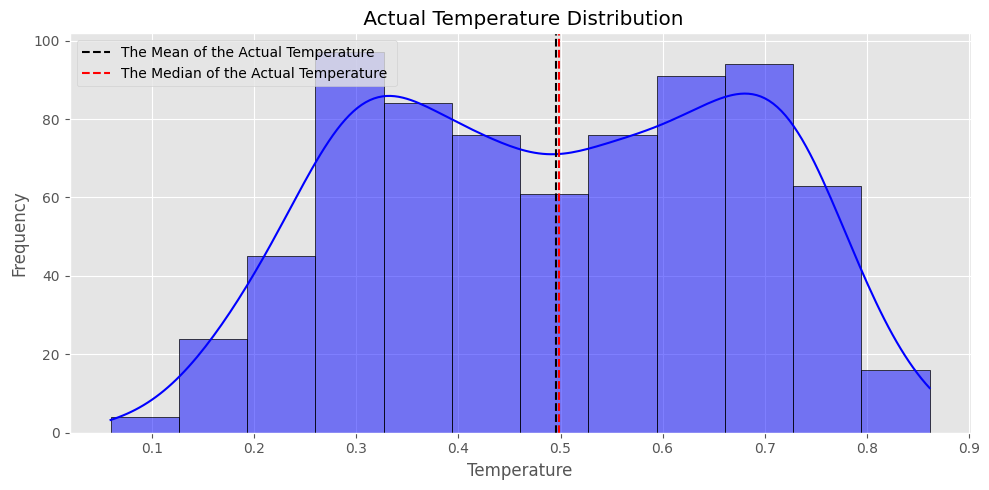

In [38]:
plt.figure(figsize=(10,5))
Temp_Averag = np.mean(Data_1["temp"])
Temp_Mediam = np.median(Data_1["temp"])
sns.histplot(Data_1["temp"]  , edgecolor = "black" ,kde=True ,common_norm=True, color="blue"  )
plt.axvline(Temp_Averag , color = "black", linestyle = "--" , label ="The Mean of the Actual Temperature ")
plt.axvline(Temp_Mediam , color = "red", linestyle = "--" , label ="The Median of the Actual Temperature ")
plt.legend()
plt.title(" Actual Temperature Distribution")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

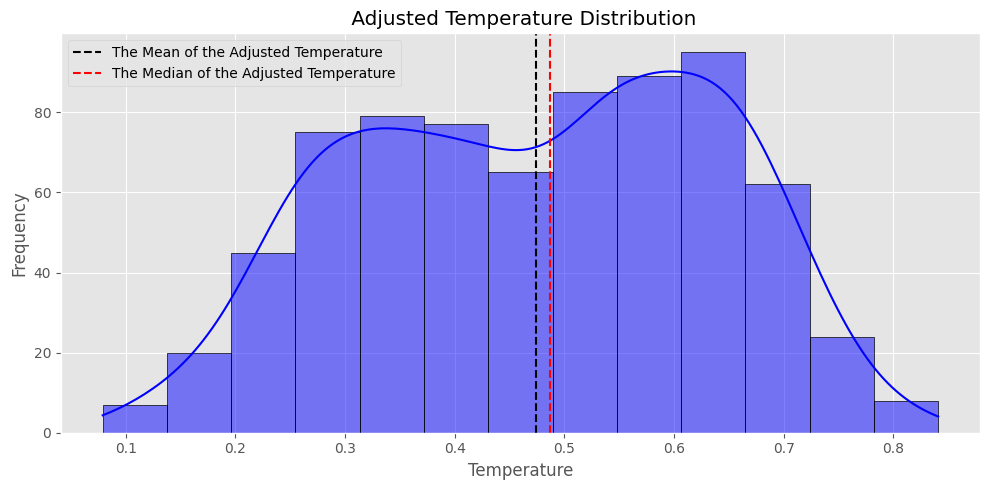

In [39]:
plt.figure(figsize=(10,5))
aTemp_Averag = np.mean(Data_1["atemp"])
aTemp_Mediam = np.median(Data_1["atemp"])
sns.histplot(Data_1["atemp"]  , edgecolor = "black" ,kde=True ,common_norm=True, color="blue"  )
plt.axvline(aTemp_Averag , color = "black", linestyle = "--" , label ="The Mean of the Adjusted Temperature ")
plt.axvline(aTemp_Mediam , color = "red", linestyle = "--" , label ="The Median of the Adjusted Temperature")
plt.legend()
plt.title(" Adjusted Temperature Distribution")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

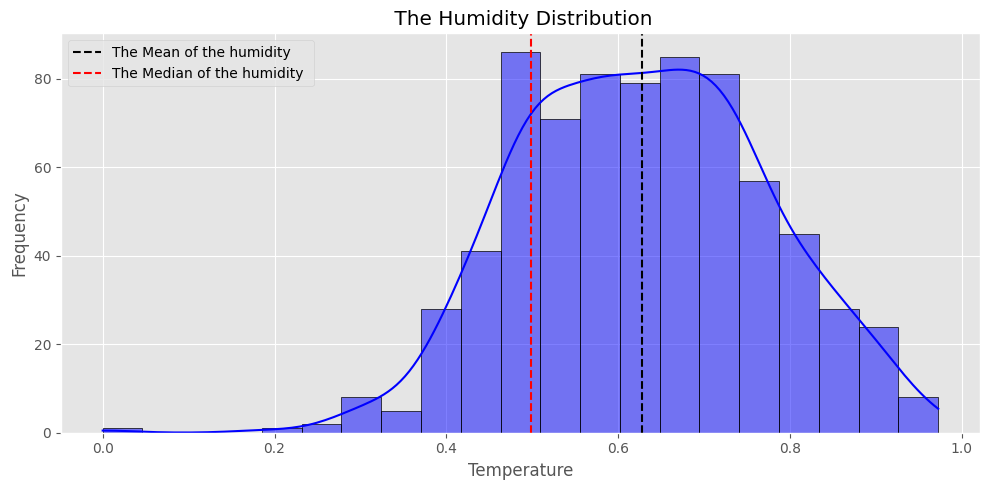

In [40]:
plt.figure(figsize=(10,5))
Hum_Averag = np.mean(Data_1["hum"])
Hum_Mediam = np.median(Data_1["temp"])
sns.histplot(Data_1["hum"]  , edgecolor = "black" ,kde=True ,common_norm=True, color="blue"  )
plt.axvline(Hum_Averag , color = "black", linestyle = "--" , label ="The Mean of the humidity ")
plt.axvline(Hum_Mediam , color = "red", linestyle = "--" , label ="The Median of the humidity ")
plt.legend()
plt.title(" The Humidity Distribution")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

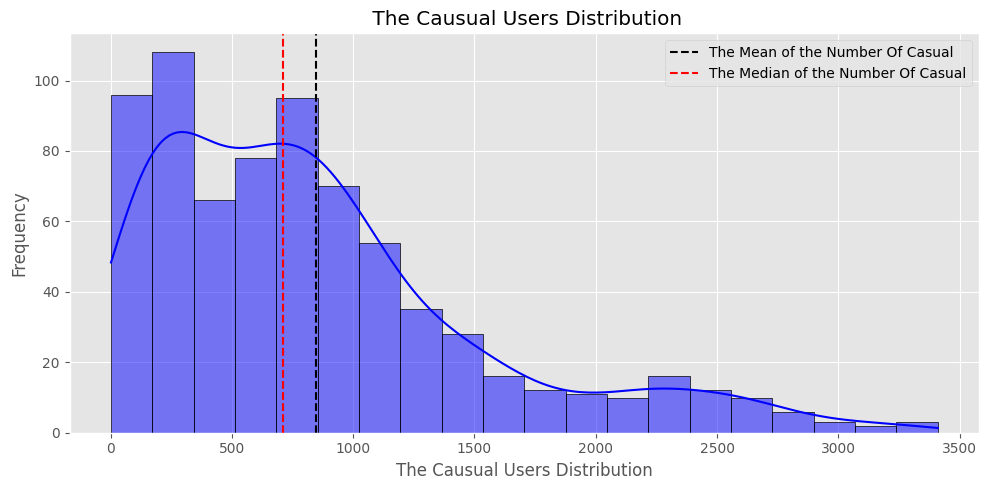

In [41]:
plt.figure(figsize=(10,5))
Casual_Averag = np.mean(Data_1["casual"])
Casual_Mediam = np.median(Data_1["casual"])
sns.histplot(Data_1["casual"]  , edgecolor = "black" ,kde=True ,common_norm=True, color="blue"  )
plt.axvline(Casual_Averag , color = "black", linestyle = "--" , label ="The Mean of the Number Of Casual ")
plt.axvline(Casual_Mediam , color = "red", linestyle = "--" , label ="The Median of the Number Of Casual")
plt.legend()
plt.title(" The Causual Users Distribution")
plt.xlabel("The Causual Users Distribution")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

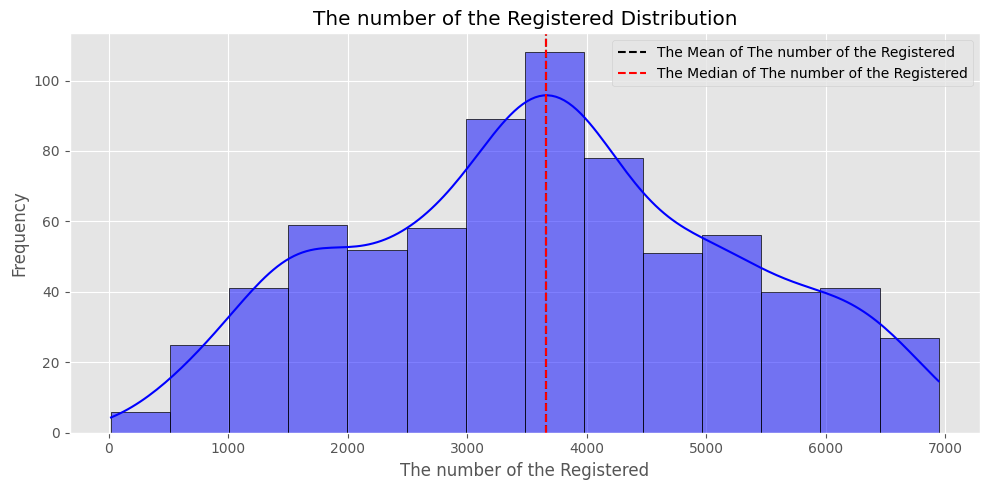

In [42]:
plt.figure(figsize=(10,5))
Registered_Averag = np.mean(Data_1["registered"])
Registered_Mediam = np.median(Data_1["registered"])
sns.histplot(Data_1["registered"]  , edgecolor = "black" ,kde=True ,common_norm=True, color="blue"  )
plt.axvline(Registered_Averag , color = "black", linestyle = "--" , label ="The Mean of The number of the Registered ")
plt.axvline(Registered_Mediam , color = "red", linestyle = "--" , label ="The Median of The number of the Registered")
plt.legend()
plt.title("The number of the Registered Distribution")
plt.xlabel("The number of the Registered")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

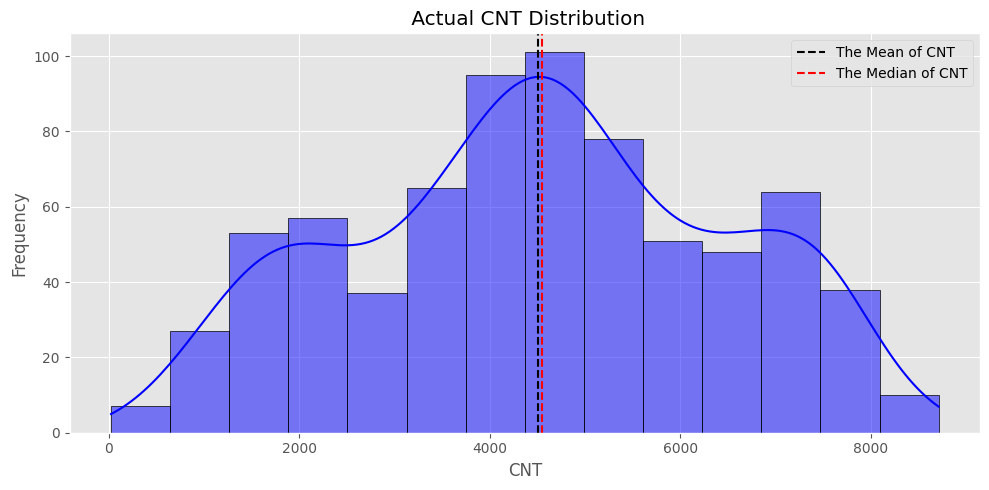

In [43]:
plt.figure(figsize=(10,5))
Cnt_Averag = np.mean(Data_1["cnt"])
Cnt_Mediam = np.median(Data_1["cnt"])
sns.histplot(Data_1["cnt"]  , edgecolor = "black" ,kde=True ,common_norm=True, color="blue"  )
plt.axvline(Cnt_Averag , color = "black", linestyle = "--" , label ="The Mean of CNT")
plt.axvline(Cnt_Mediam , color = "red", linestyle = "--" , label ="The Median of CNT")
plt.legend()
plt.title(" Actual CNT Distribution")
plt.xlabel("CNT")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

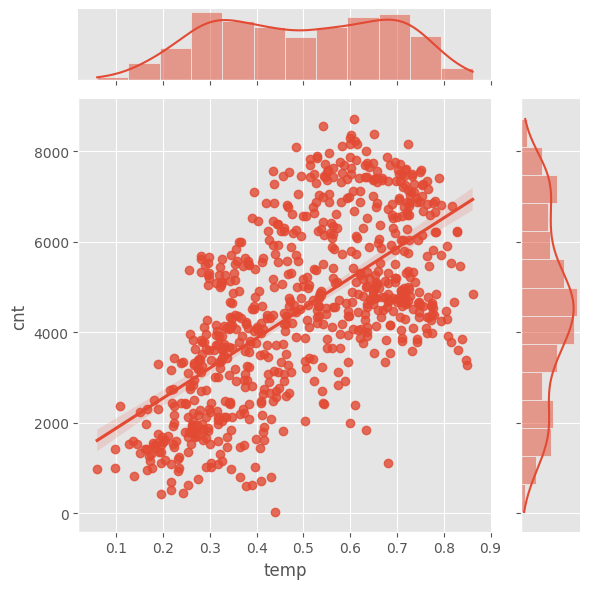

In [44]:
plt.figure(figsize=(15,8))
sns.jointplot(data=Data_1 , x="temp",y="cnt" , kind="reg" , palette="plasma" )
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

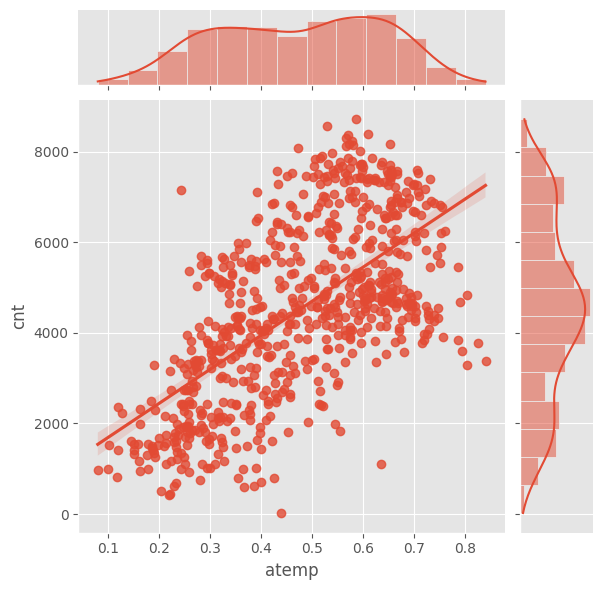

In [45]:
plt.figure(figsize=(15,8))
sns.jointplot(data=Data_1 , x="atemp",y="cnt" , kind="reg" , palette="plasma" )
plt.show()

<Figure size 1500x800 with 0 Axes>

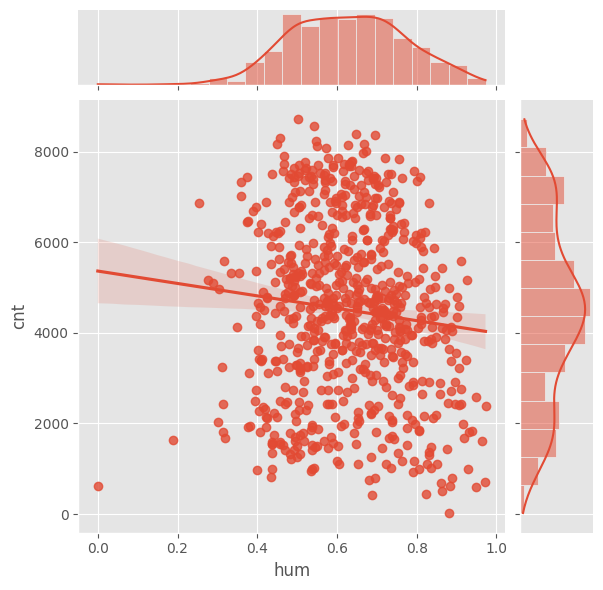

In [46]:
plt.figure(figsize=(15,8))
sns.jointplot(data=Data_1 , x="hum",y="cnt" , kind="reg" , palette="plasma" )
plt.show()

<Figure size 1000x500 with 0 Axes>

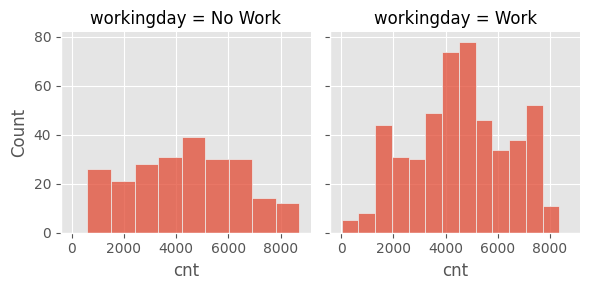

In [47]:
plt.figure(figsize=(10,5))
G = sns.FacetGrid(data=Data_1 , col="workingday")
G.map(sns.histplot, "cnt" )
plt.show()

<Figure size 1500x800 with 0 Axes>

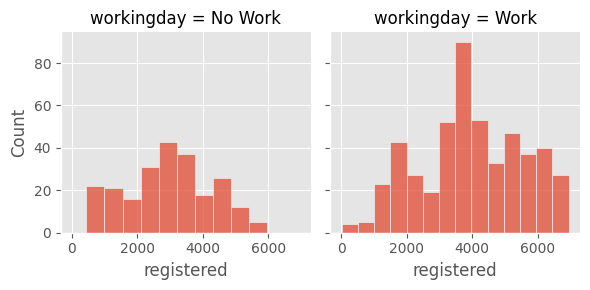

In [48]:
plt.figure(figsize=(15,8))
G = sns.FacetGrid(data=Data_1 , col="workingday")
G.map(sns.histplot, "registered" )

<Figure size 2000x800 with 0 Axes>

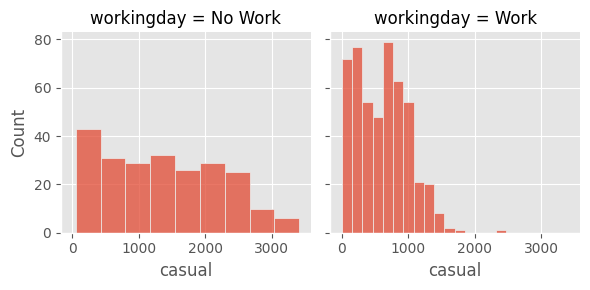

In [49]:
plt.figure(figsize=(20,8))
G = sns.FacetGrid(data=Data_1 , col="workingday")
G.map(sns.histplot, "casual" )
plt.show()

<Figure size 2000x800 with 0 Axes>

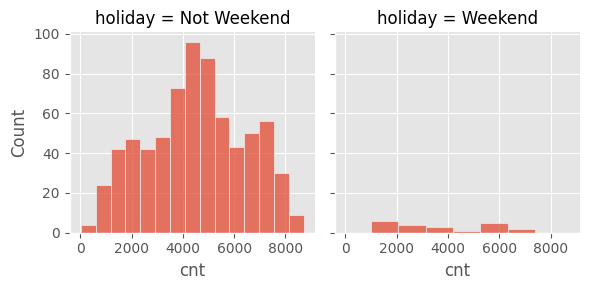

In [50]:
plt.figure(figsize=(20,8))
G = sns.FacetGrid(data=Data_1 , col="holiday")
G.map(sns.histplot, "cnt" )
plt.show()

<Figure size 2000x800 with 0 Axes>

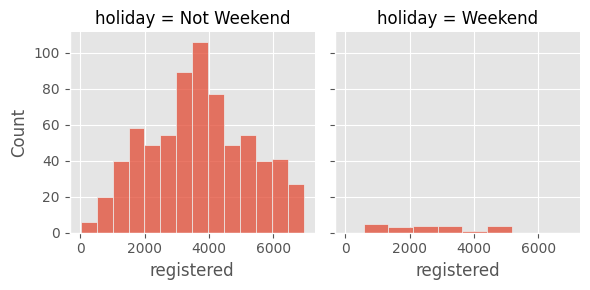

In [51]:
plt.figure(figsize=(20,8))
G = sns.FacetGrid(data=Data_1 , col="holiday")
G.map(sns.histplot, "registered" )
plt.show()

<Figure size 2000x800 with 0 Axes>

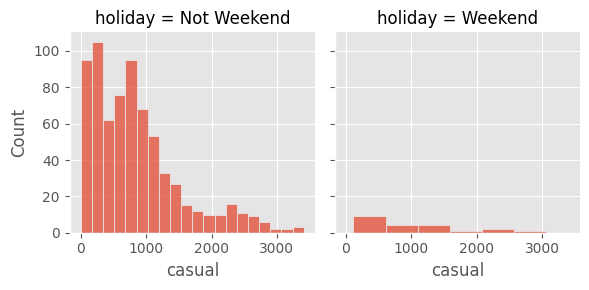

In [52]:
plt.figure(figsize=(20,8))
G = sns.FacetGrid(data=Data_1 , col="holiday")
G.map(sns.histplot, "casual" )
plt.show()

<Figure size 2000x800 with 0 Axes>

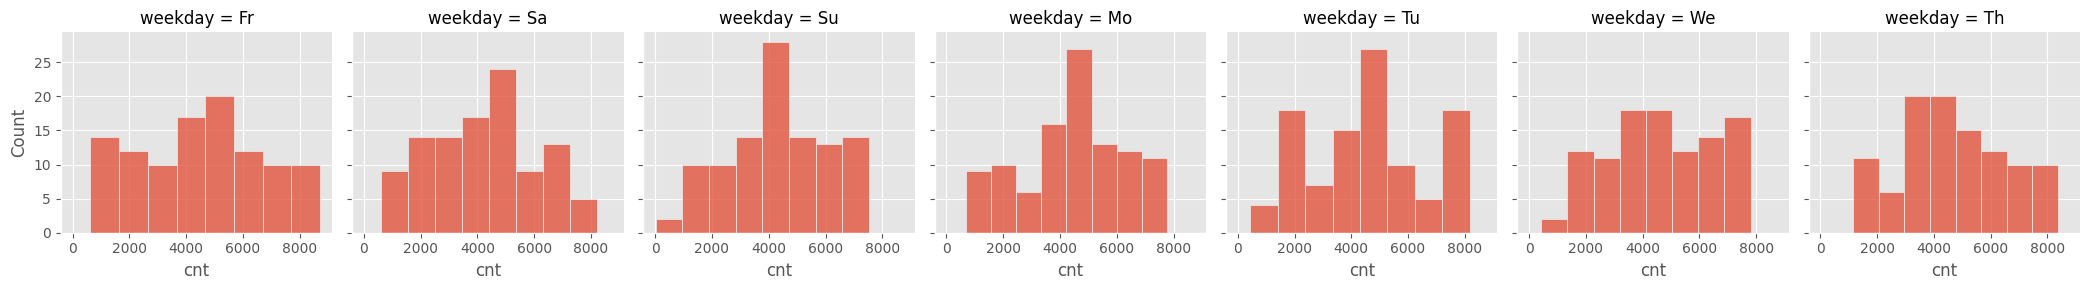

In [53]:
plt.figure(figsize=(20,8))
G = sns.FacetGrid(data=Data_1 , col="weekday")
G.map(sns.histplot, "cnt" )
plt.show()

<Figure size 2000x800 with 0 Axes>

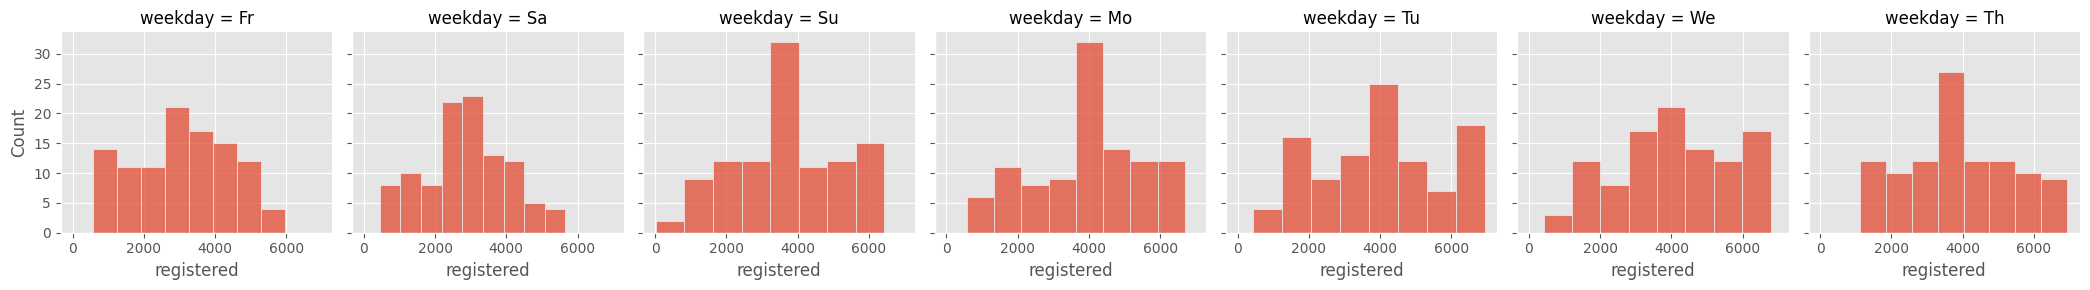

In [54]:
plt.figure(figsize=(20,8))
G = sns.FacetGrid(data=Data_1 , col="weekday")
G.map(sns.histplot, "registered" )
plt.show()

<Figure size 2000x800 with 0 Axes>

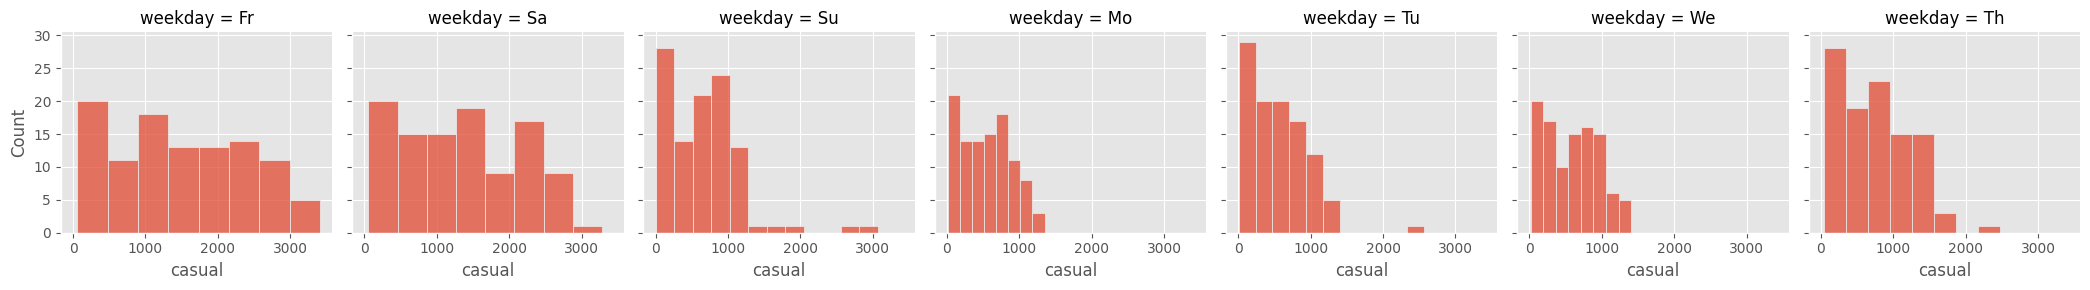

In [55]:
plt.figure(figsize=(20,8))
G = sns.FacetGrid(data=Data_1 , col="weekday")
G.map(sns.histplot, "casual" )
plt.show()

<Figure size 2000x800 with 0 Axes>

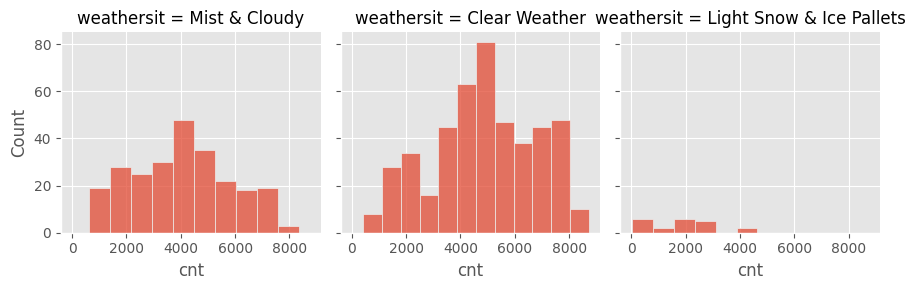

In [56]:
plt.figure(figsize=(20,8))
G = sns.FacetGrid(data=Data_1 , col="weathersit")
G.map(sns.histplot, "cnt" )
plt.show()

<Figure size 2000x800 with 0 Axes>

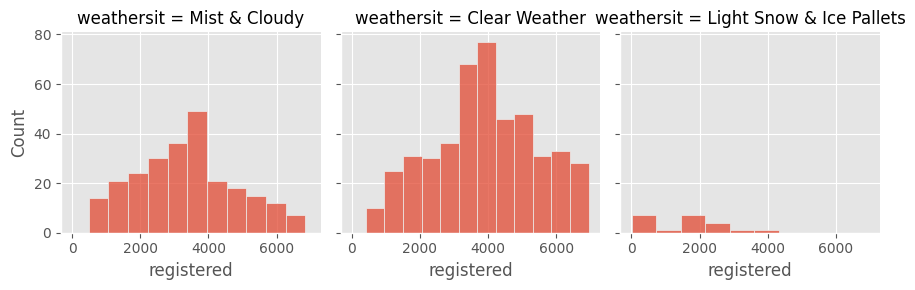

In [57]:
plt.figure(figsize=(20,8))
G = sns.FacetGrid(data=Data_1 , col="weathersit")
G.map(sns.histplot, "registered" )
plt.show()

<Figure size 2000x800 with 0 Axes>

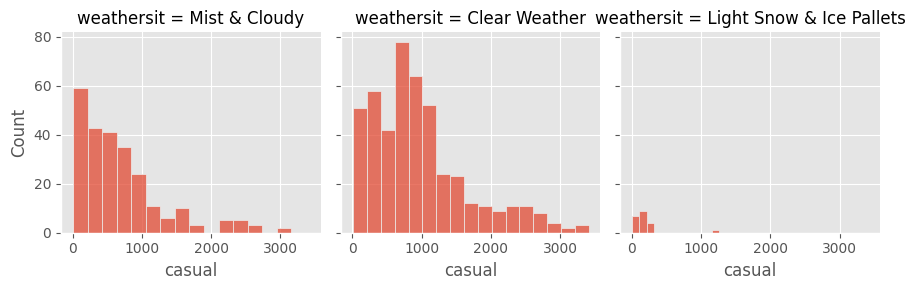

In [58]:
plt.figure(figsize=(20,8))
G = sns.FacetGrid(data=Data_1 , col="weathersit")
G.map(sns.histplot, "casual" )
plt.show()

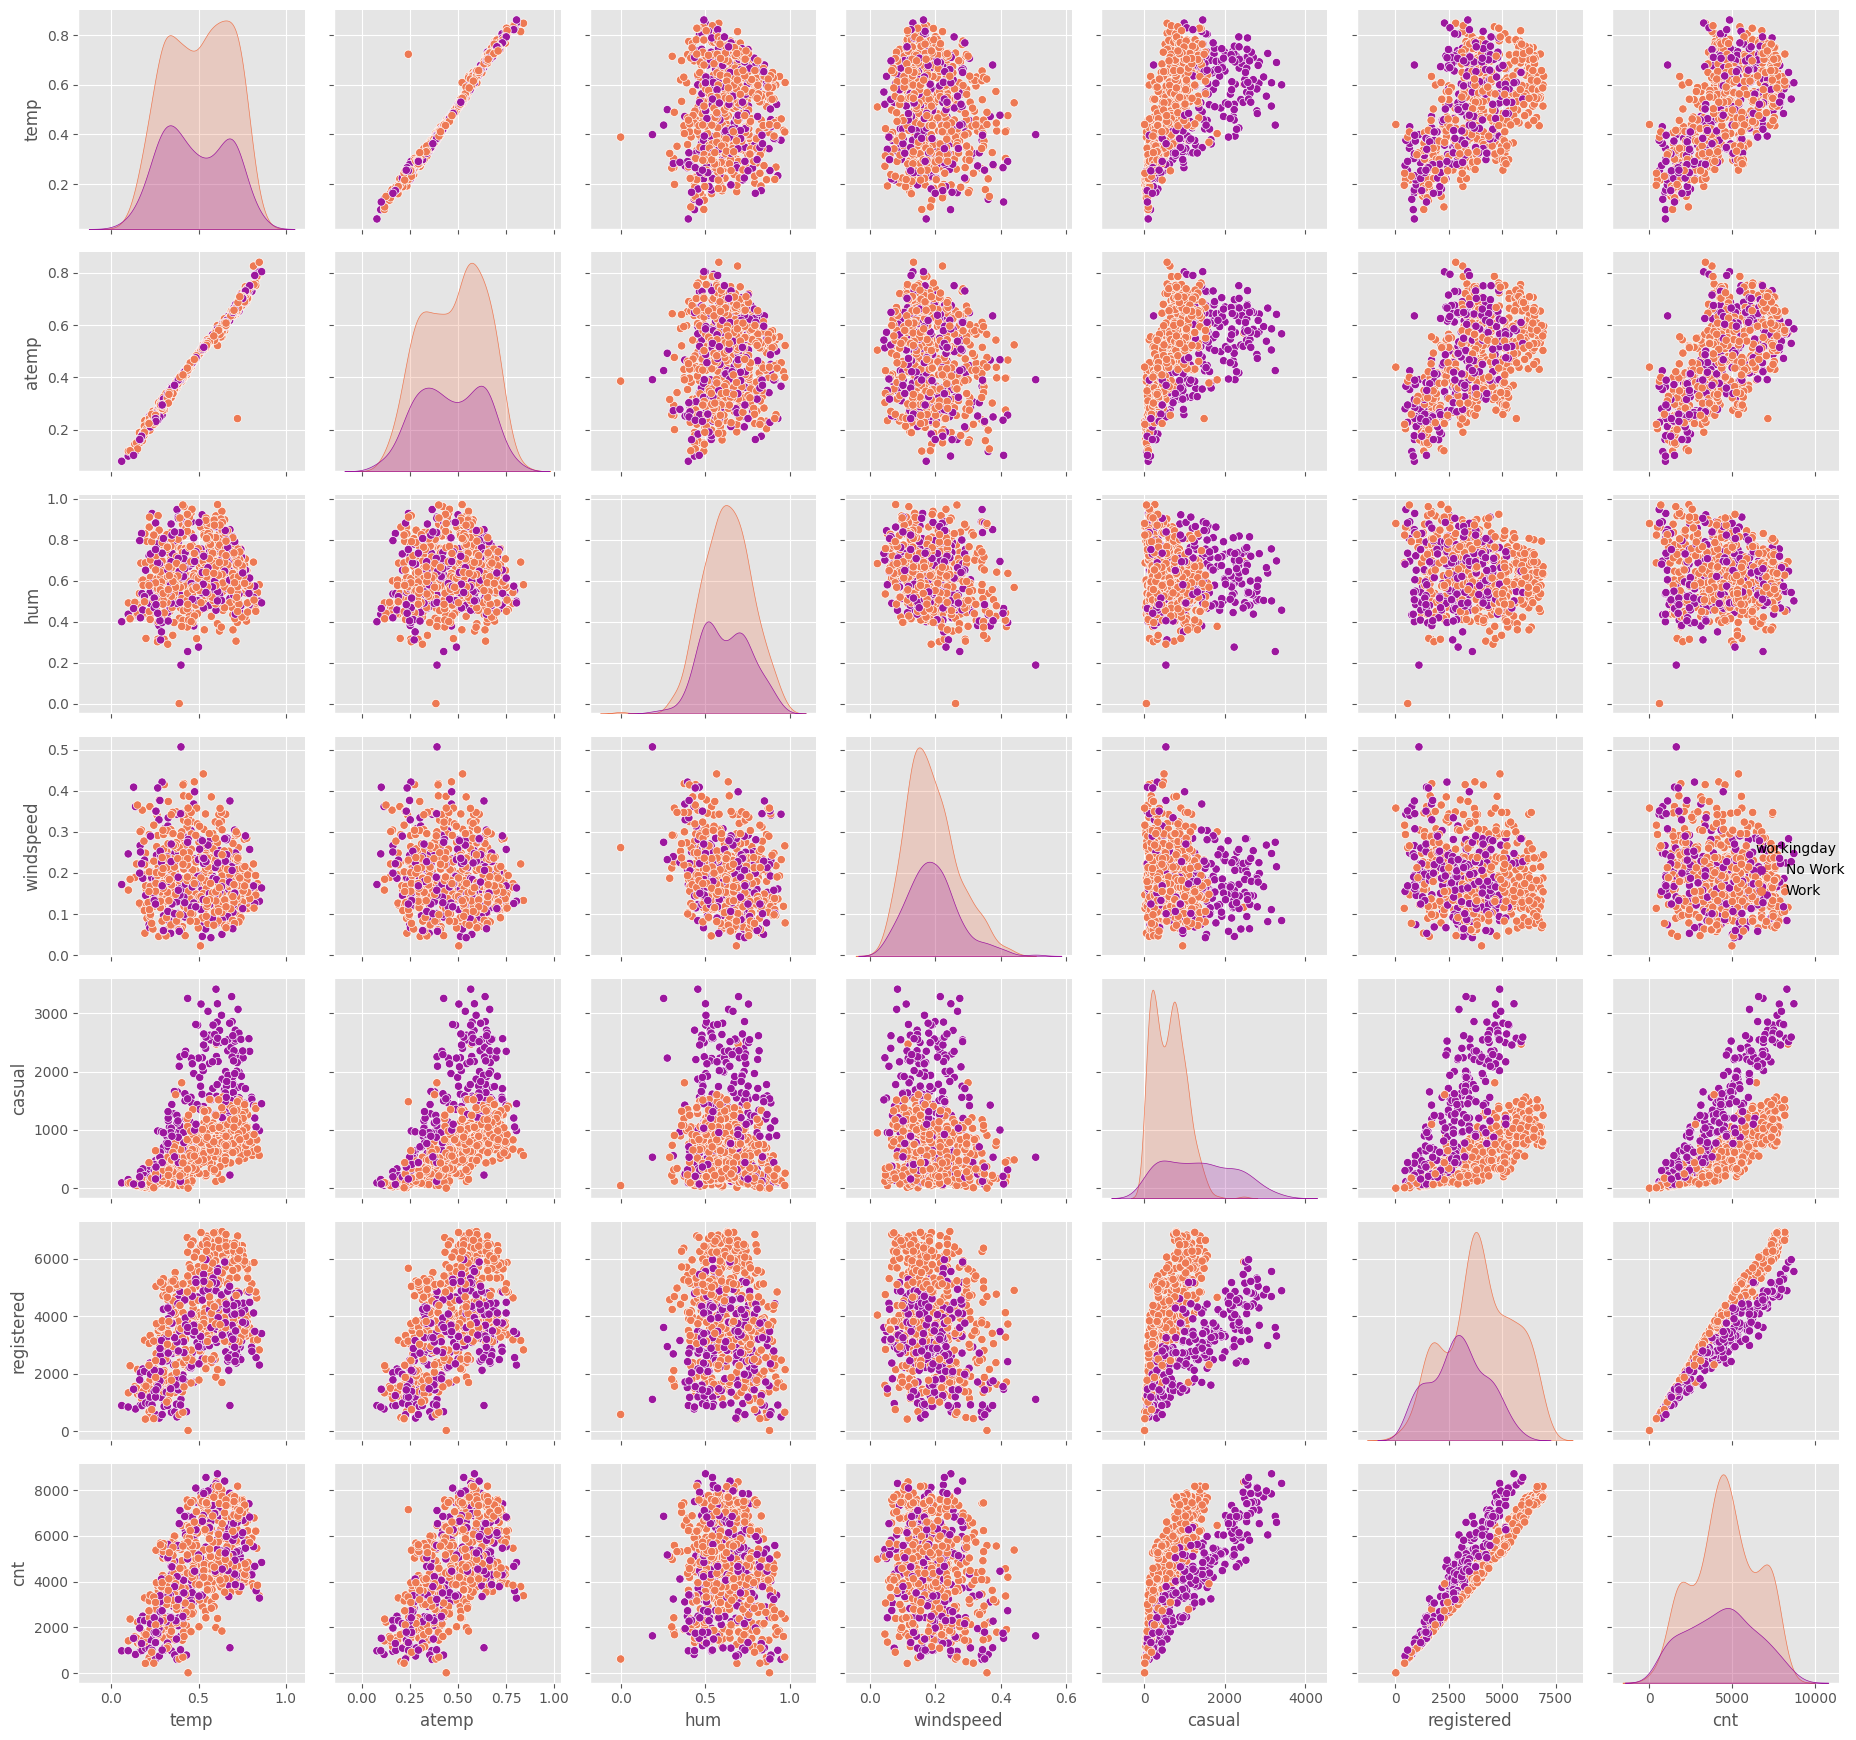

In [59]:
Data = Data_1.drop(['season',"mnth" , "holiday" , "weekday"  ,"weathersit"  , "yr" ,"dteday"] , axis=1 )
sns.pairplot(Data,hue='workingday', palette="plasma")
plt.tight_layout()
plt.show()

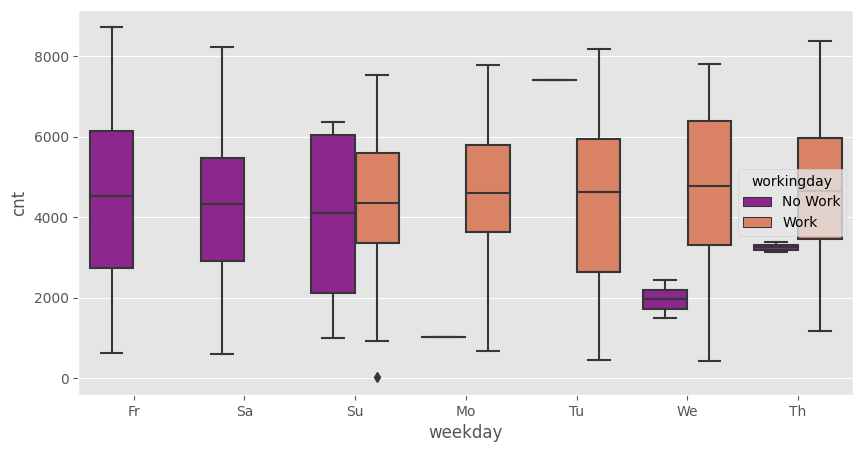

In [60]:
plt.figure(figsize=(10,5))
sns.boxplot(data=Data_1 , x= "weekday" , y= "cnt" , hue="workingday" , palette="plasma")
plt.show()

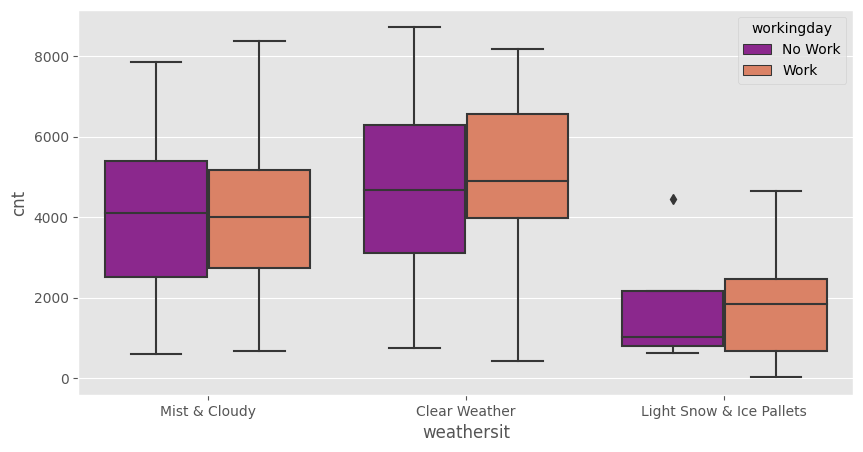

In [61]:
plt.figure(figsize=(10,5))
sns.boxplot(data=Data_1 , x= "weathersit" , y= "cnt" , hue="workingday" , palette="plasma")
plt.show()

In [62]:
Data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 731 entries, 1 to 731
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    object        
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    object        
 5   weekday     731 non-null    object        
 6   workingday  731 non-null    object        
 7   weathersit  731 non-null    object        
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 91.4+ KB


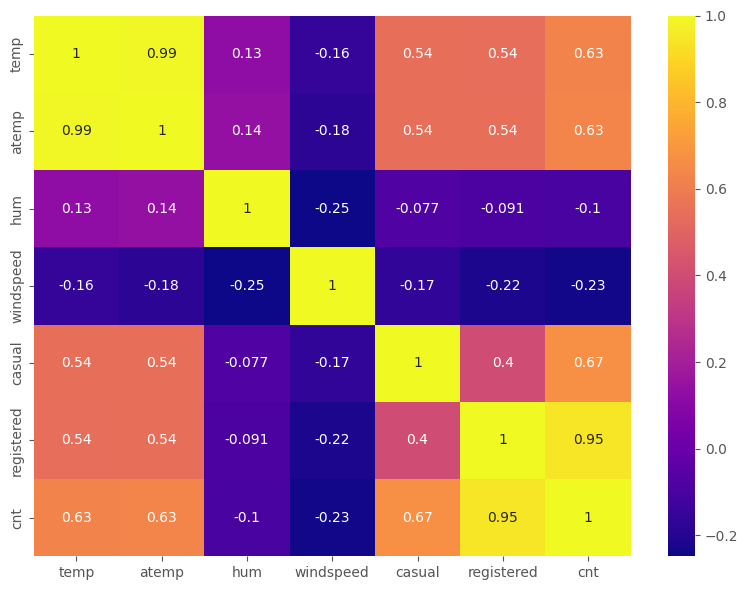

In [63]:
Data_2 = Data_1.drop(["dteday","season","yr","mnth","holiday","weekday","workingday","weathersit"], axis=1)
plt.figure(figsize=(8,6))
Data_Matrix= Data_2.corr()
sns.heatmap(Data_Matrix , annot=True , cmap="plasma")
plt.tight_layout()
plt.show()